# **1. Fetal Health Classification Project**
This project aims to classify fetal health using various machine learning algorithms. The dataset contains several features related to fetal health.
# Data Preprocessing
We perform the following preprocessing steps:

1.Handling missing values
2.Scaling features
3.Splitting the data into training and testing sets
# Machine Learning Models
We will use the following models:

Logistic Regression
Decision Tree Classifier
Random Forest Classifier
# Evaluation Metrics
We will evaluate the models using the following metrics:

Accuracy
Precision
Recall
F1 Score
ROC AUC
# Install numpy, pandas, matplotlib, seaborn
!pip install numpy pandas matplotlib seaborn

# Install scikit-learn
!pip install scikit-learn

In [2]:
!python -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Importing the dependencies(libraries)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (precision_score, recall_score, confusion_matrix, 
                             classification_report, accuracy_score, f1_score, 
                             roc_curve, auc, roc_auc_score)
np.random.seed(0)

# Preprocessing the Data

In [6]:
file_path = r'D:\Fetal-health-Classfication\fetal_health.csv'
data = pd.read_csv(file_path)
print(data.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0             120          0.000             0.0                 0.000   
1             132          0.006             0.0                 0.006   
2             133          0.003             0.0                 0.008   
3             134          0.003             0.0                 0.008   
4             132          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                               73

In [7]:
data.tail()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

In [9]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [10]:
data.shape

(2126, 22)

In [11]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [12]:
print(data)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0                120          0.000           0.000                 0.000   
1                132          0.006           0.000                 0.006   
2                133          0.003           0.000                 0.008   
3                134          0.003           0.000                 0.008   
4                132          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121             140          0.000           0.000                 0.007   
2122             140          0.001           0.000                 0.007   
2123             140          0.001           0.000                 0.007   
2124             140          0.001           0.000                 0.006   
2125             142          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [13]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [14]:
data.fetal_movement.unique()

array([0.   , 0.072, 0.222, 0.408, 0.38 , 0.441, 0.383, 0.451, 0.469,
       0.34 , 0.425, 0.334, 0.135, 0.099, 0.108, 0.112, 0.089, 0.103,
       0.085, 0.109, 0.079, 0.065, 0.055, 0.058, 0.047, 0.038, 0.012,
       0.018, 0.02 , 0.005, 0.003, 0.006, 0.001, 0.004, 0.009, 0.01 ,
       0.002, 0.008, 0.007, 0.028, 0.026, 0.107, 0.013, 0.016, 0.029,
       0.05 , 0.053, 0.011, 0.015, 0.022, 0.021, 0.017, 0.019, 0.025,
       0.014, 0.024, 0.023, 0.035, 0.054, 0.03 , 0.048, 0.088, 0.043,
       0.052, 0.091, 0.033, 0.092, 0.084, 0.115, 0.041, 0.04 , 0.027,
       0.031, 0.063, 0.06 , 0.071, 0.306, 0.298, 0.139, 0.189, 0.157,
       0.235, 0.36 , 0.455, 0.443, 0.47 , 0.477, 0.446, 0.481, 0.369,
       0.335, 0.43 , 0.346, 0.323, 0.375, 0.353, 0.045, 0.032, 0.051,
       0.036, 0.037, 0.049])

In [15]:
data.nunique()

baseline value                                             48
accelerations                                              20
fetal_movement                                            102
uterine_contractions                                       16
light_decelerations                                        16
severe_decelerations                                        2
prolongued_decelerations                                    6
abnormal_short_term_variability                            75
mean_value_of_short_term_variability                       57
percentage_of_time_with_abnormal_long_term_variability     87
mean_value_of_long_term_variability                       249
histogram_width                                           154
histogram_min                                             109
histogram_max                                              86
histogram_number_of_peaks                                  18
histogram_number_of_zeroes                                  9
histogra

In [16]:
data.light_decelerations.value_counts()

light_decelerations
0.000    1231
0.001     163
0.003     118
0.002     115
0.004     114
0.005     107
0.006      74
0.008      55
0.007      54
0.009      37
0.010      15
0.011      13
0.012      12
0.013       8
0.014       7
0.015       3
Name: count, dtype: int64

# Box Plotting and Anlaysing the Outliers

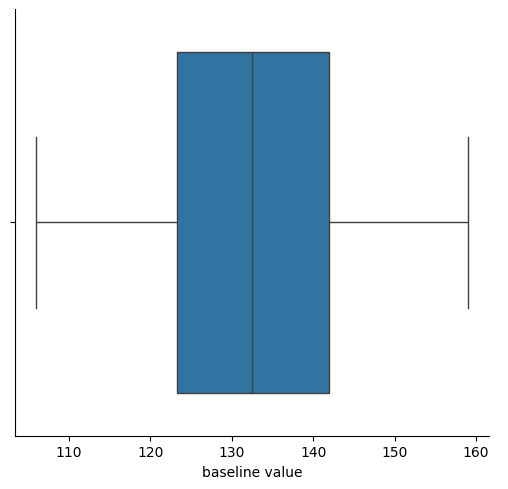

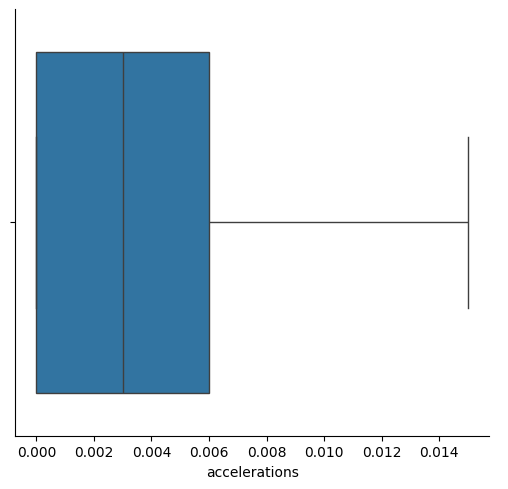

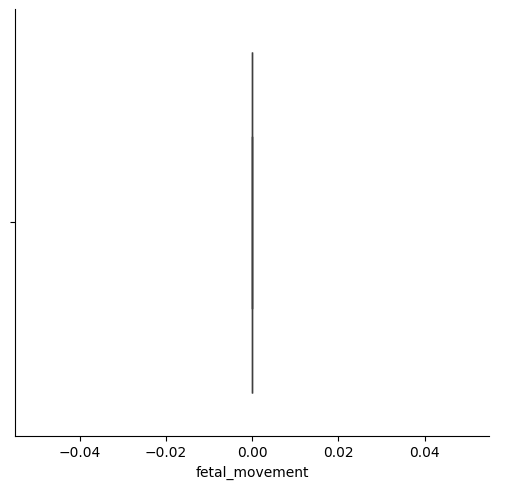

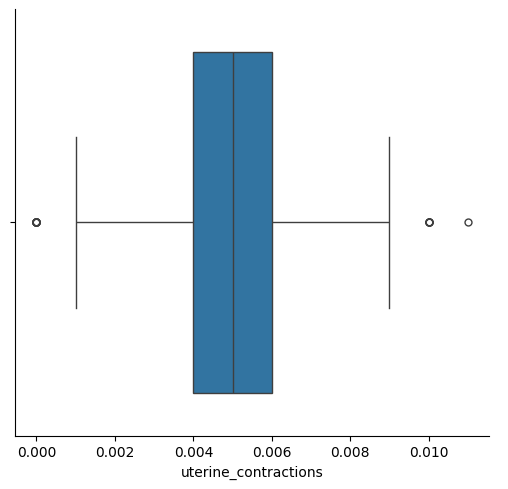

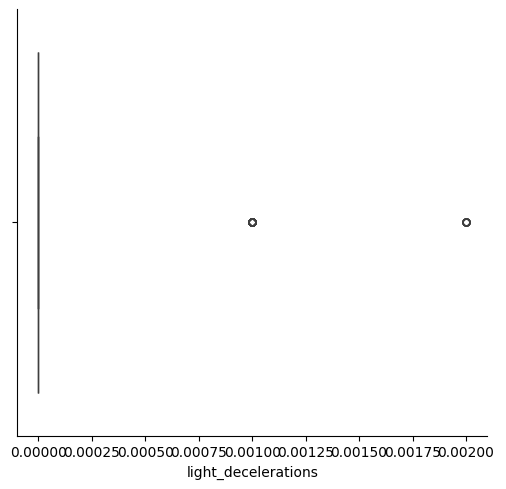

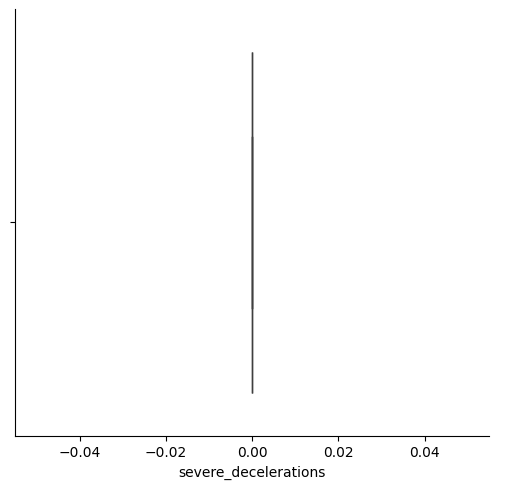

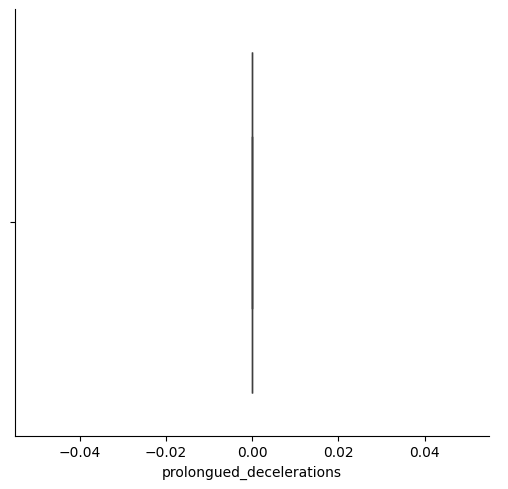

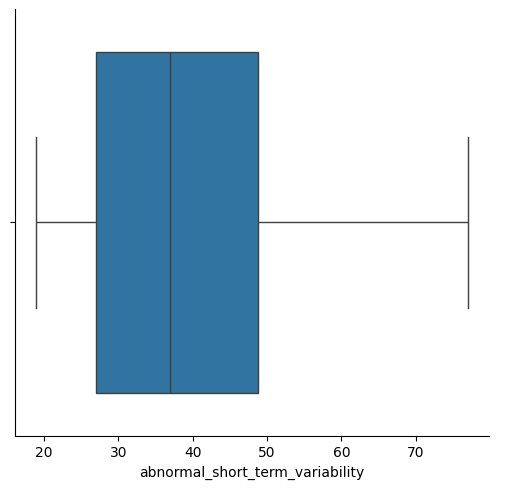

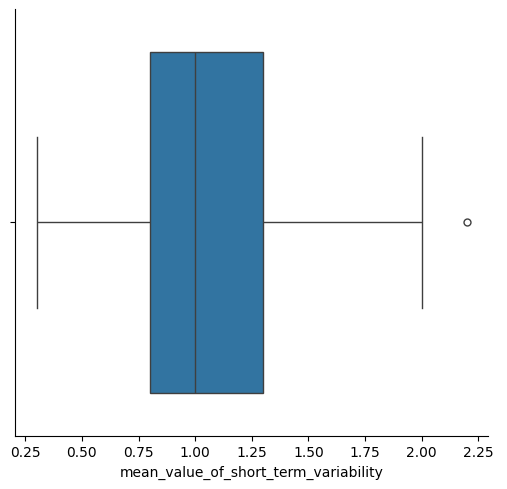

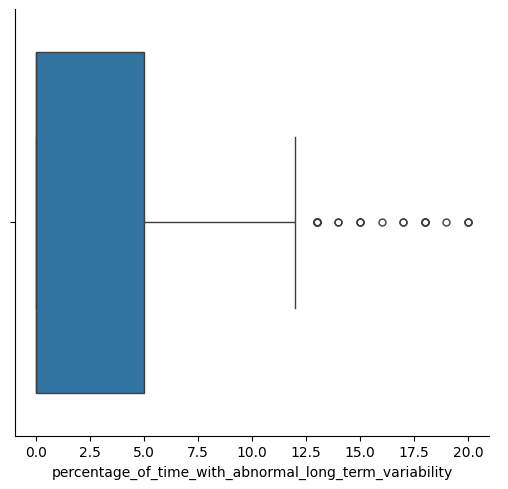

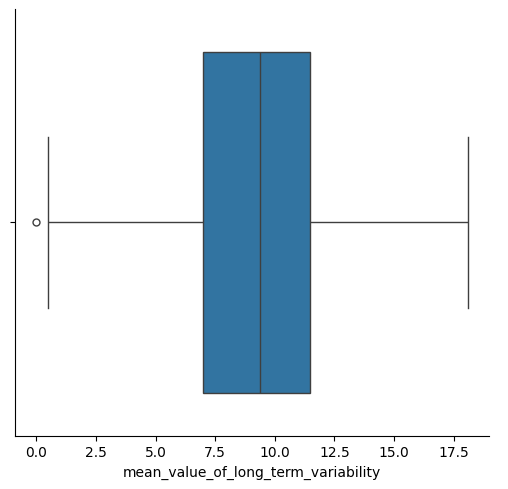

In [80]:
sns.catplot(x='baseline value',kind='box',data=data)
sns.catplot(x='accelerations',kind='box',data=data)
sns.catplot(x='fetal_movement',kind='box',data=data)
sns.catplot(x='uterine_contractions',kind='box',data=data)
sns.catplot(x='light_decelerations',kind='box',data=data)
sns.catplot(x='severe_decelerations',kind='box',data=data)
sns.catplot(x='prolongued_decelerations',kind='box',data=data)
sns.catplot(x='abnormal_short_term_variability',kind='box',data=data)
sns.catplot(x='mean_value_of_short_term_variability',kind='box',data=data)
sns.catplot(x='percentage_of_time_with_abnormal_long_term_variability',kind='box',data=data)
sns.catplot(x='mean_value_of_long_term_variability',kind='box',data=data)


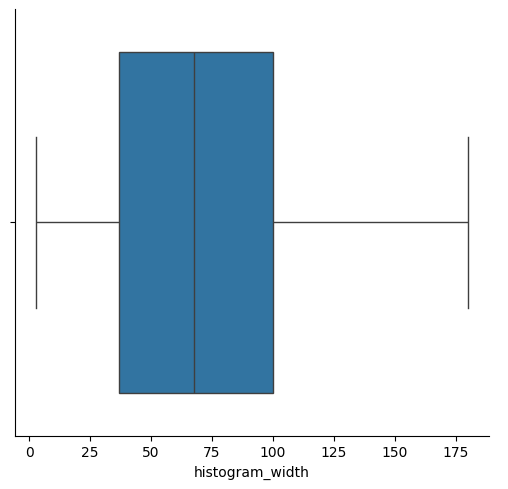

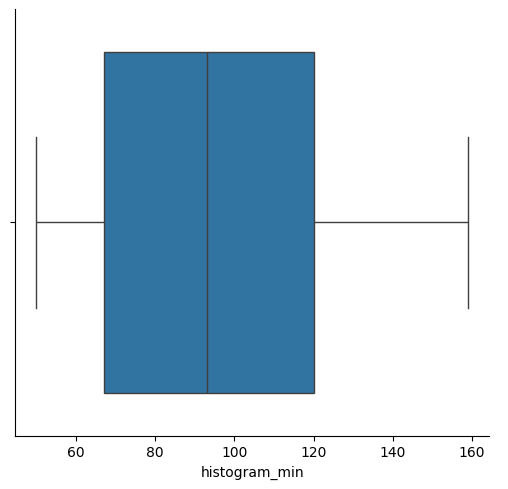

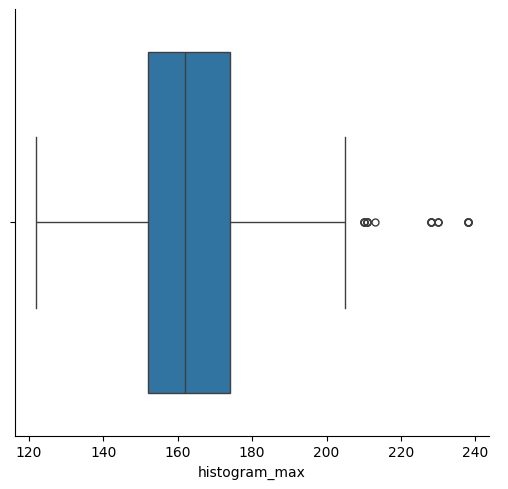

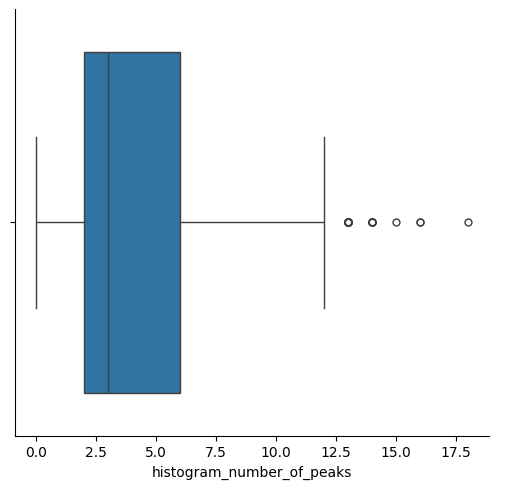

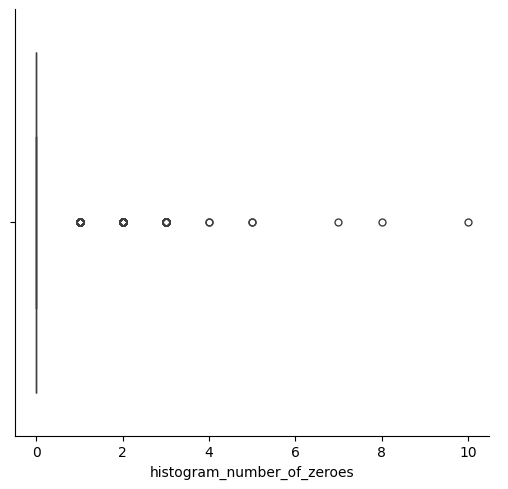

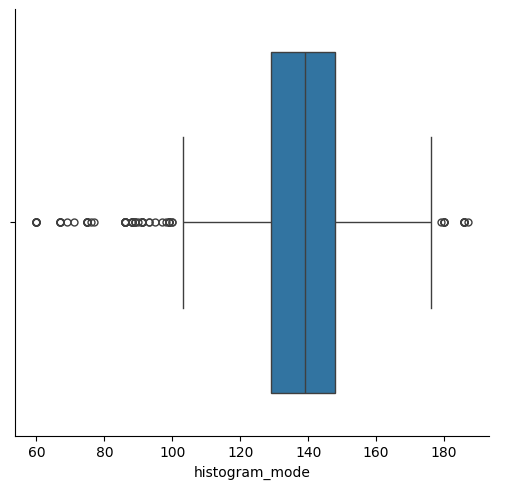

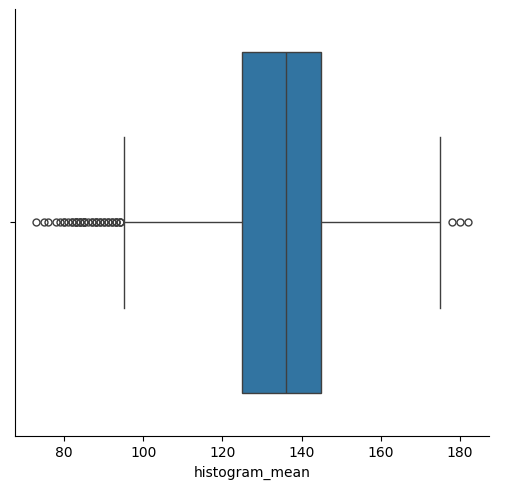

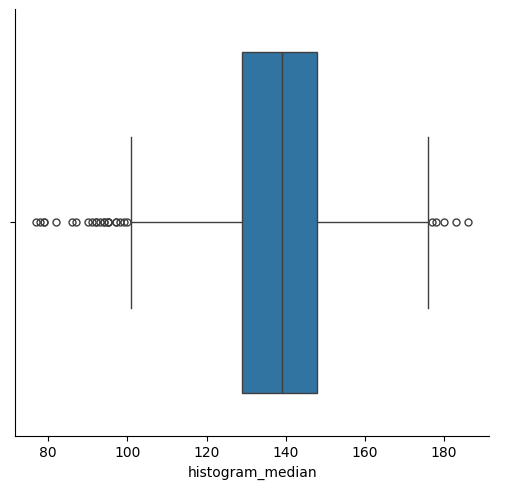

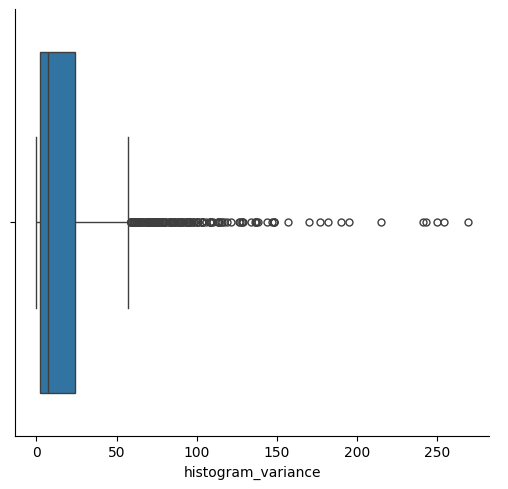

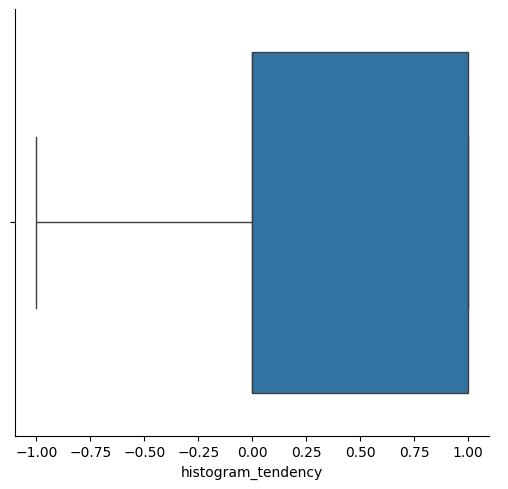

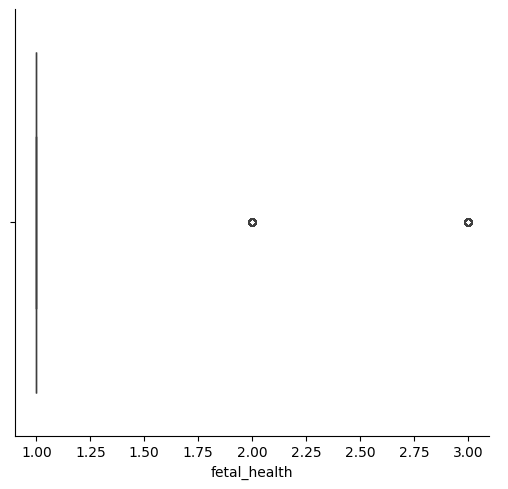

In [18]:
sns.catplot(x='histogram_width',kind='box',data=data)
sns.catplot(x='histogram_min',kind='box',data=data)
sns.catplot(x='histogram_max',kind='box',data=data)
sns.catplot(x='histogram_number_of_peaks',kind='box',data=data)
sns.catplot(x='histogram_number_of_zeroes',kind='box',data=data)
sns.catplot(x='histogram_mode',kind='box',data=data)
sns.catplot(x='histogram_mean',kind='box',data=data)
sns.catplot(x='histogram_median',kind='box',data=data)
sns.catplot(x='histogram_variance',kind='box',data=data)
sns.catplot(x='histogram_tendency',kind='box',data=data)
sns.catplot(x='fetal_health',kind='box',data=data)

# Cleaning the data by removing the Outliers

# Removing the outliers by using IQR (Interquartile Range Method)

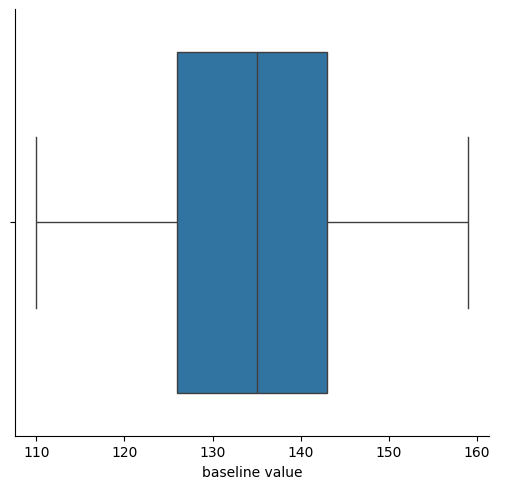

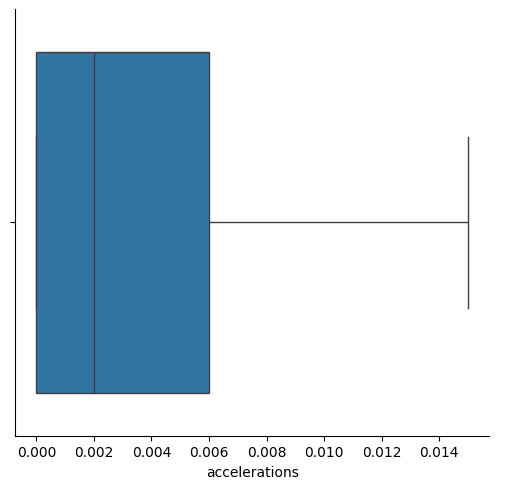

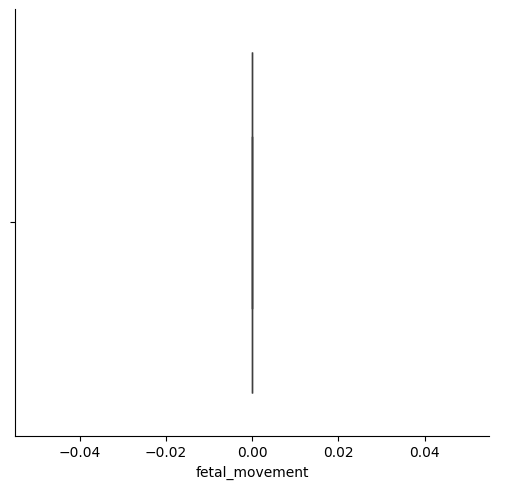

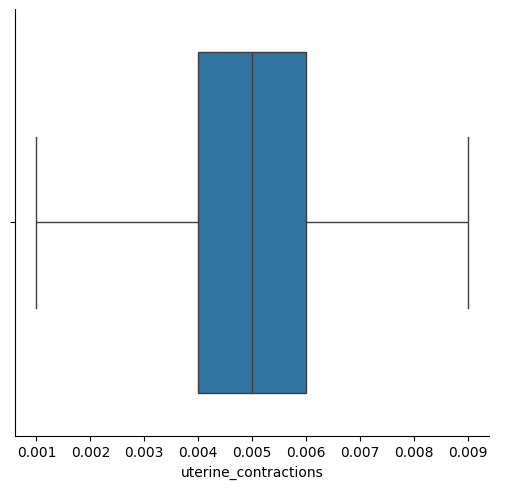

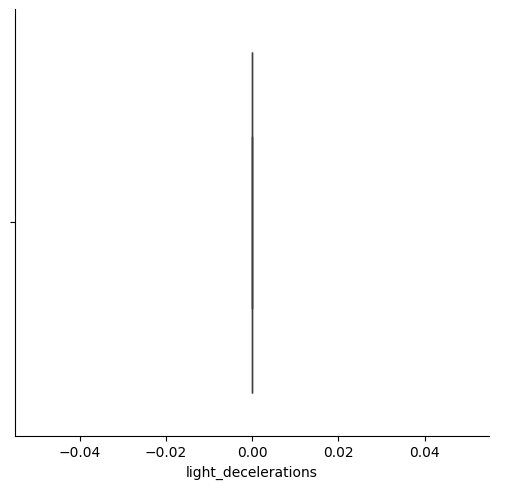

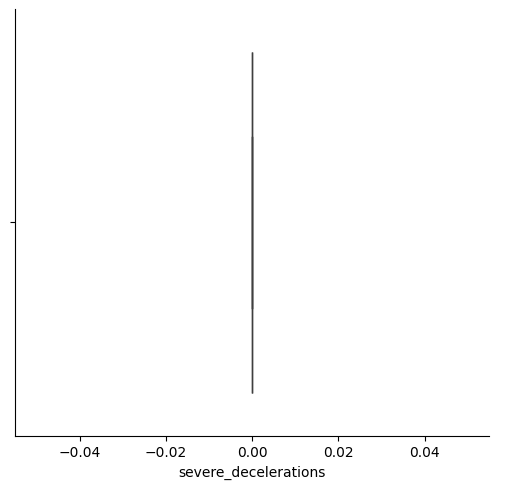

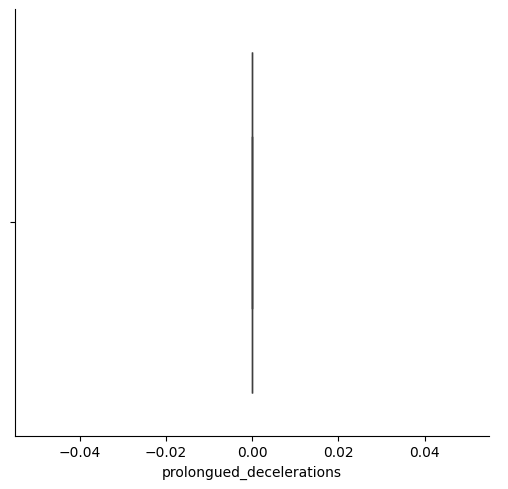

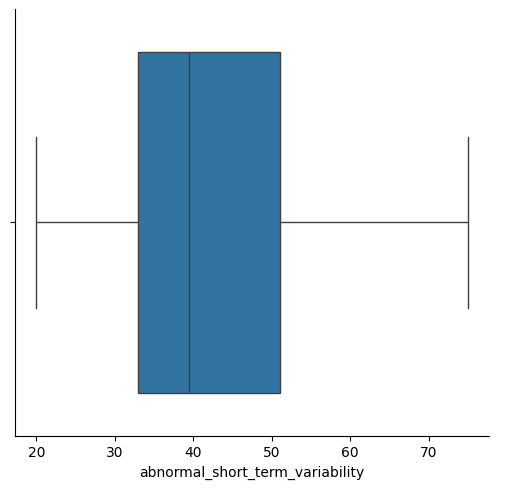

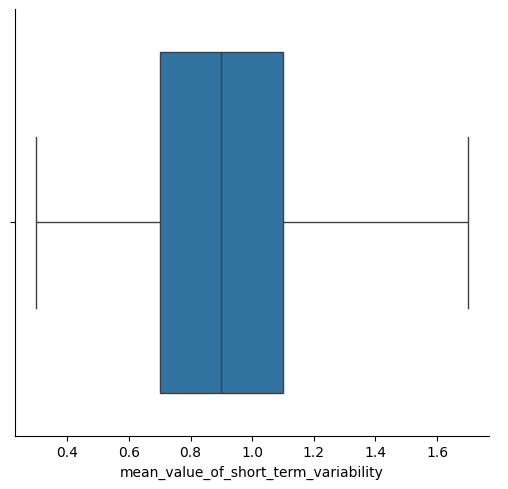

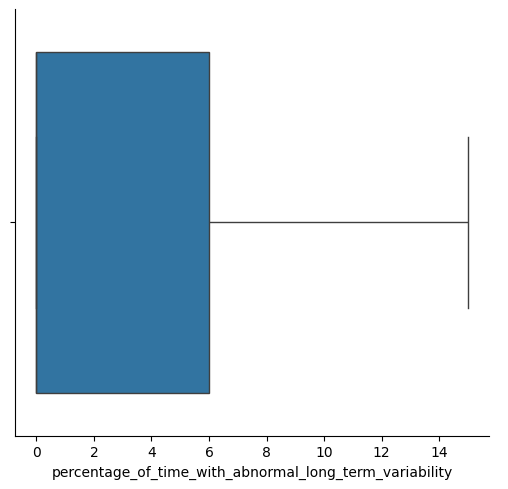

In [83]:


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for all columns
columns = [
    'baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 
    'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 
    'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 
    'percentage_of_time_with_abnormal_long_term_variability' 
    
]


for col in columns:
    data=remove_outliers(data,col)
for col in columns:
    sns.catplot(x=col,kind='box',data=data)




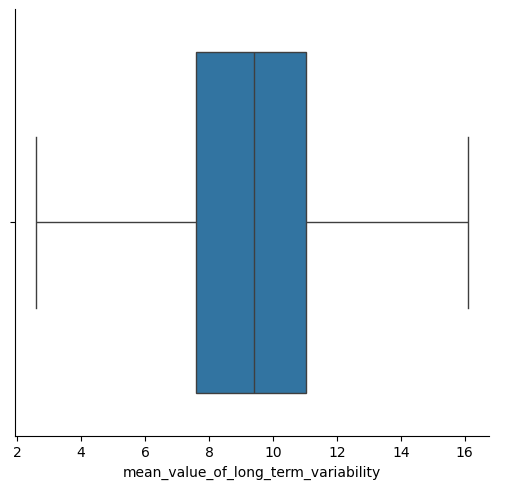

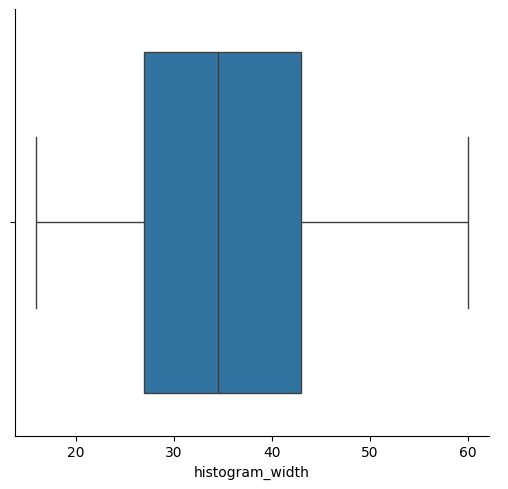

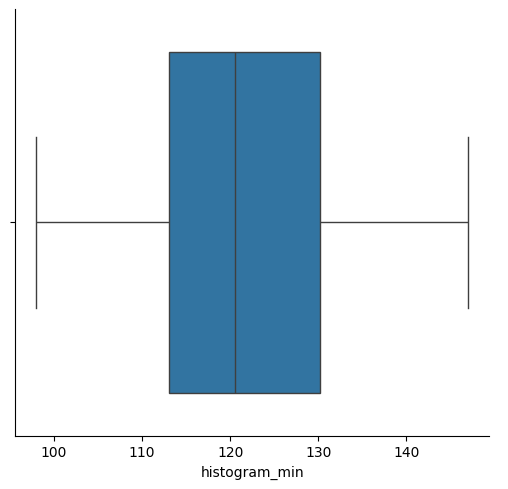

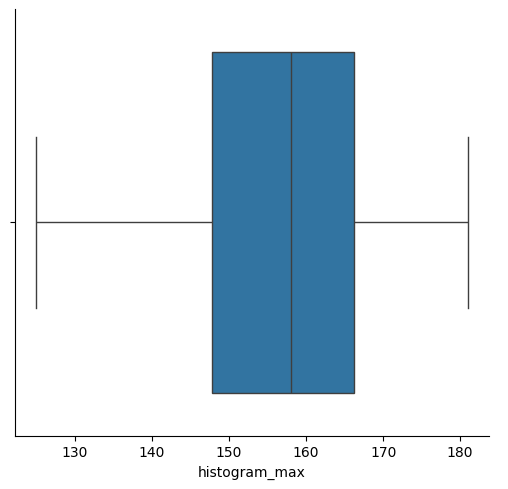

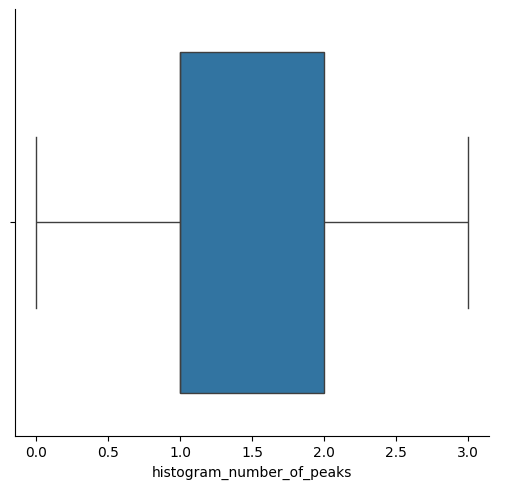

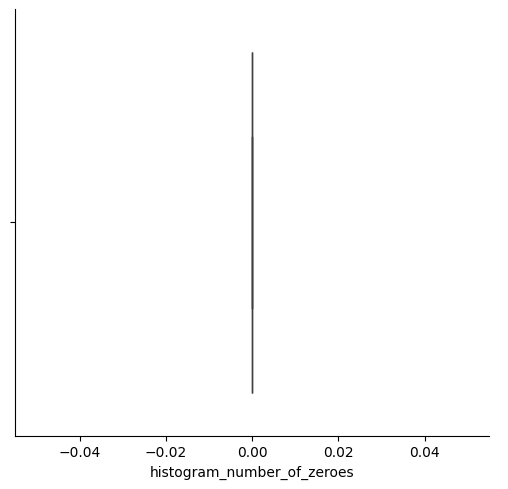

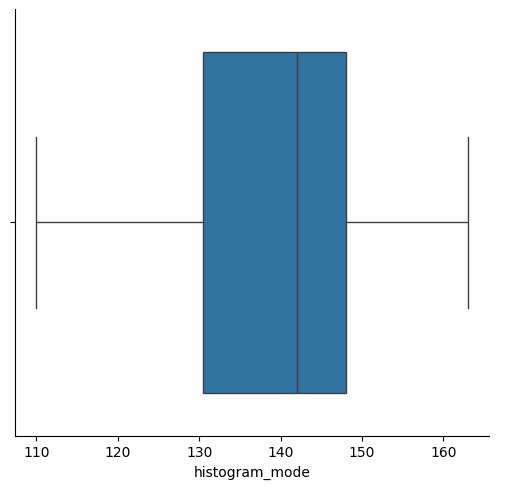

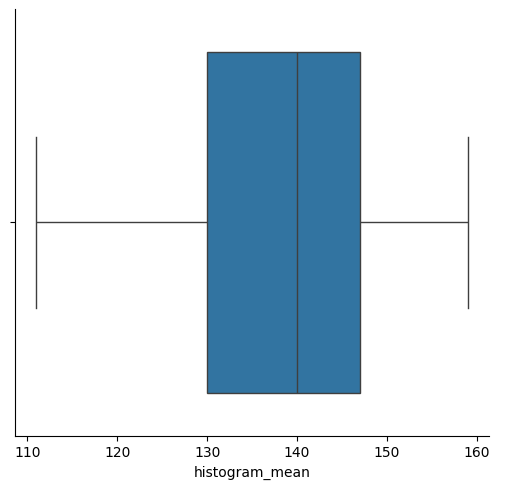

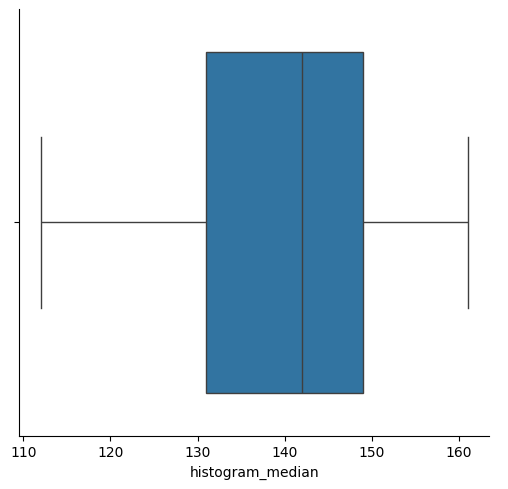

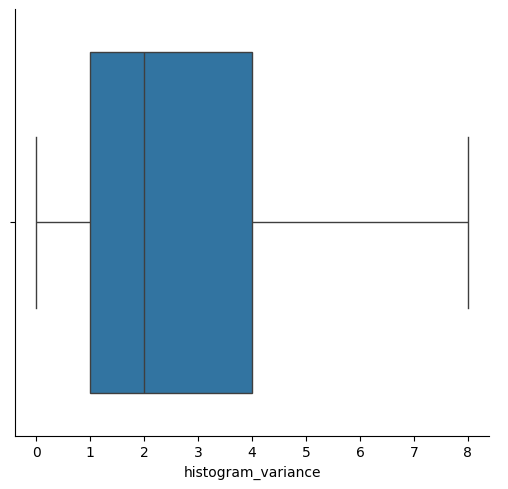

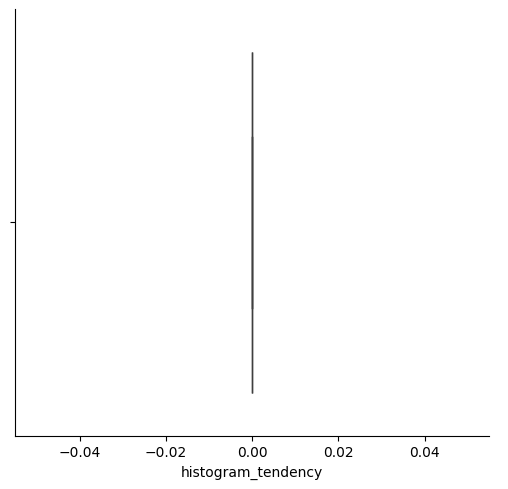

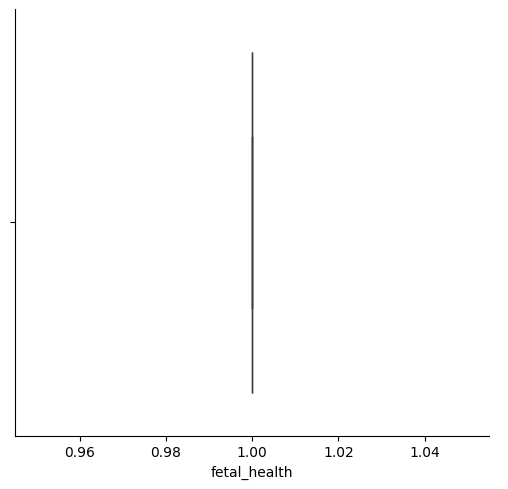

In [91]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Removing outliers for all columns
columns = [
   'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 
    'histogram_tendency','fetal_health']
    



for col in columns:
    data=remove_outliers(data,col)
for col in columns:
    sns.catplot(x=col,kind='box',data=data)

# Data Visualization

# Correlation Matrix (Heat Map)

<Axes: >

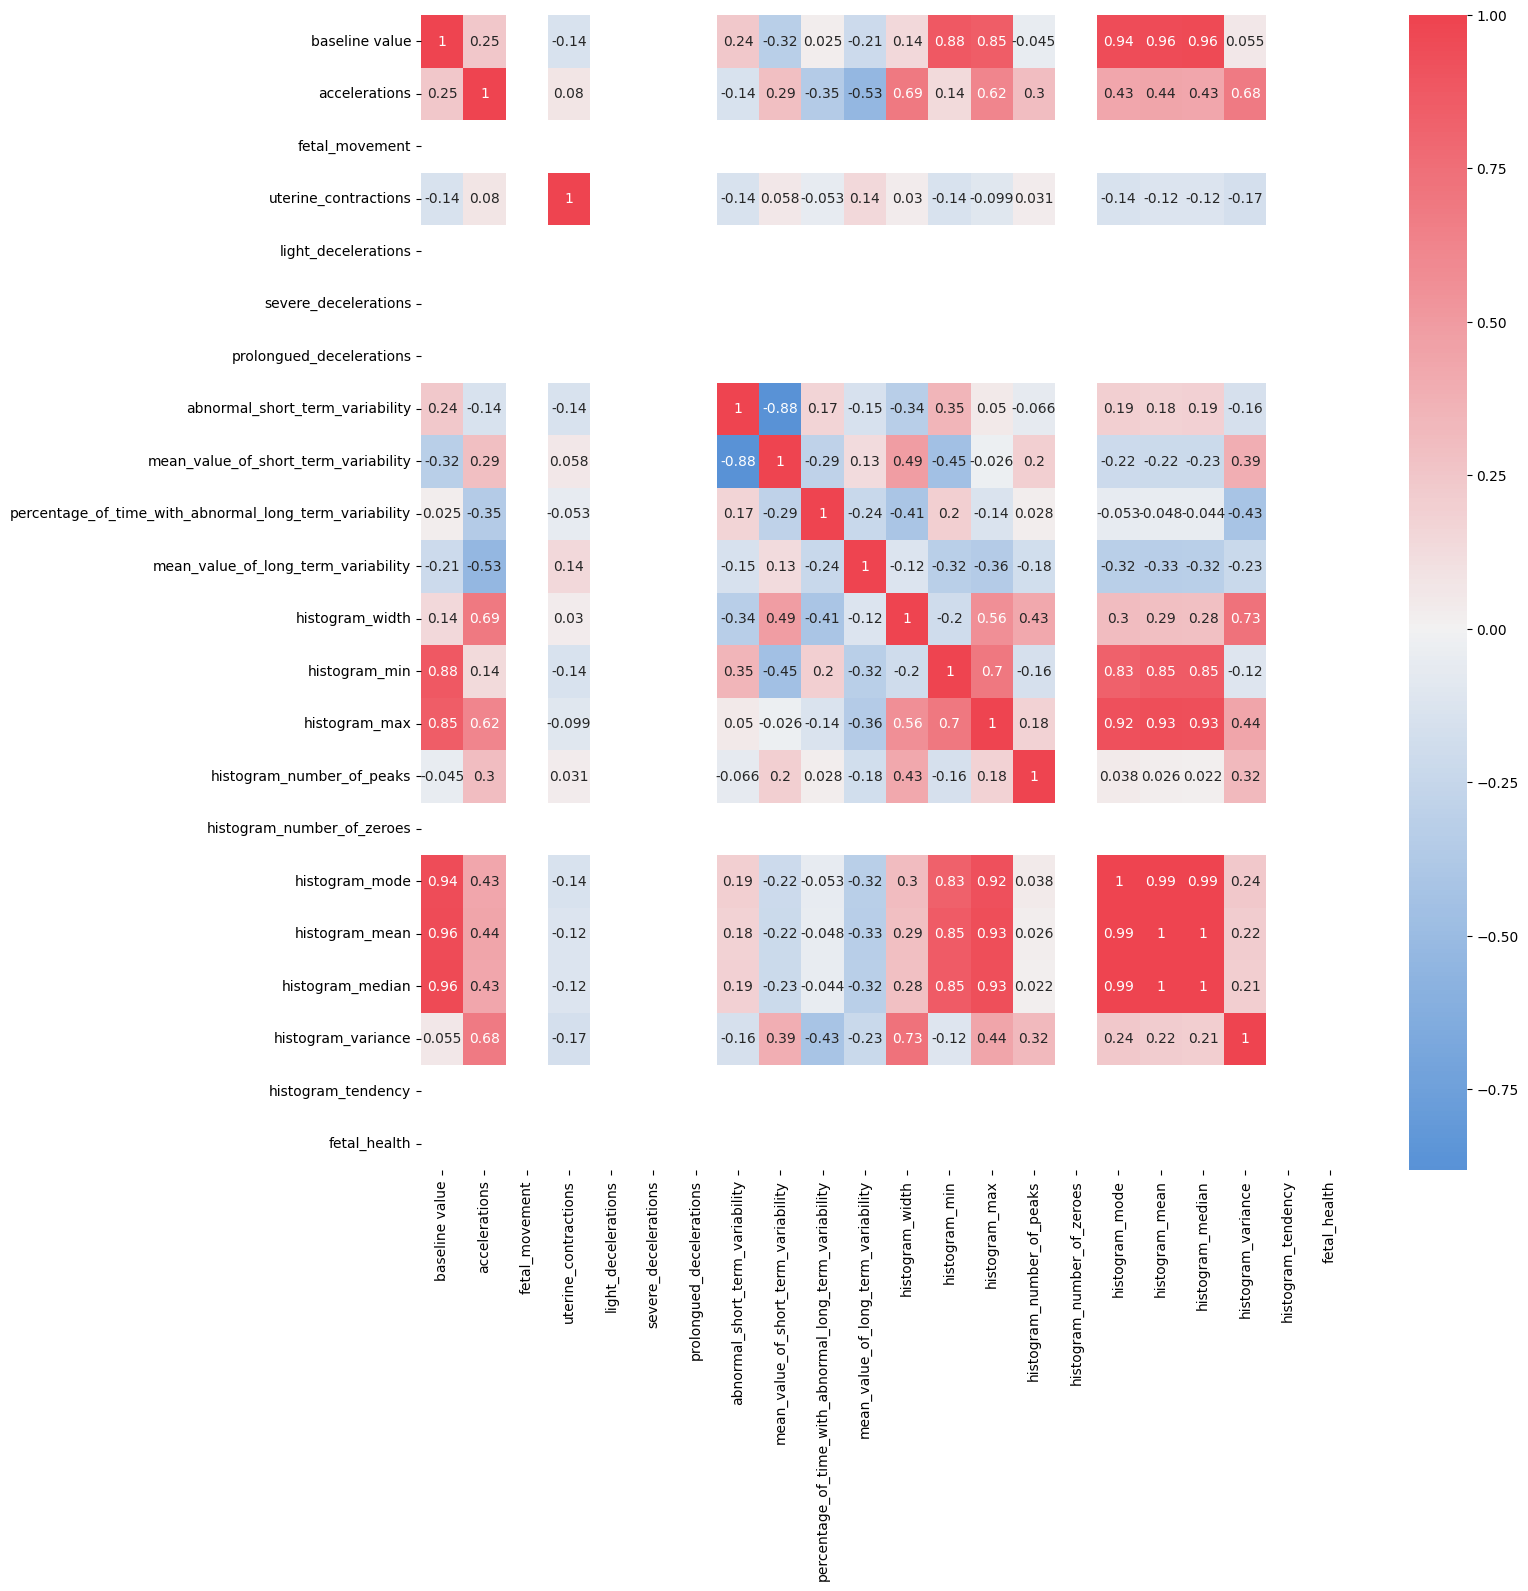

In [92]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(15,15))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

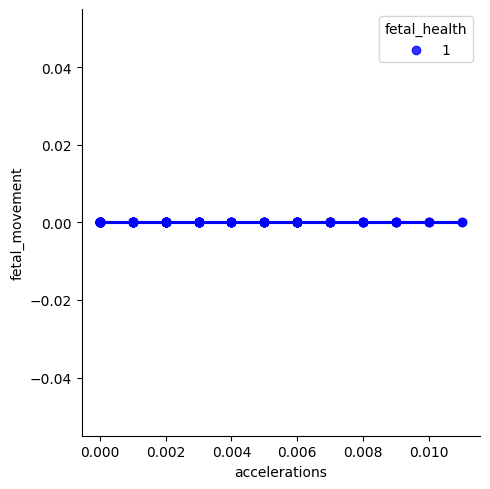

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colours variable with a list of colors
colours = ["blue", "orange", "green"]

# Create the lmplot with the updated way to pass legend_out
sns.lmplot(data=data, x="accelerations", y="fetal_movement", palette=colours, hue="fetal_health", facet_kws={'legend_out': False})
plt.show()

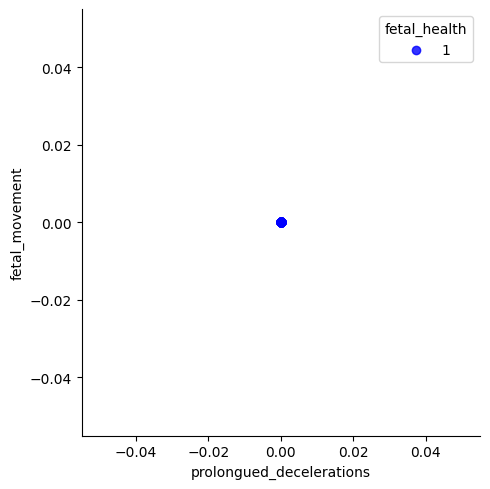

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colours variable with a list of colors
colours = ["blue", "orange", "green"]

# Create the lmplot with the updated way to pass legend_out
sns.lmplot(data=data, x="prolongued_decelerations", y="fetal_movement", palette=colours, hue="fetal_health", facet_kws={'legend_out': False})
plt.show()

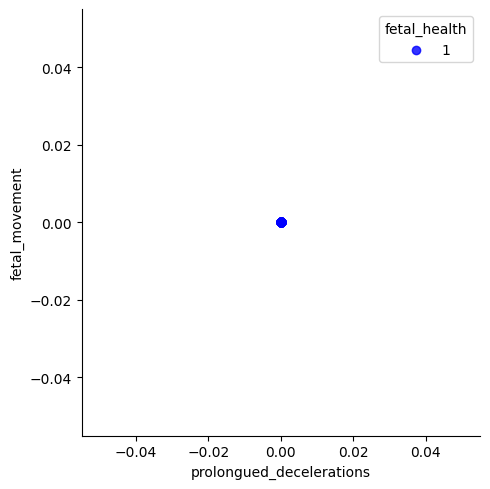

In [95]:
sns.lmplot(data=data, x="prolongued_decelerations", y="fetal_movement", palette=colours, hue="fetal_health", facet_kws={'legend_out': False})
plt.show()


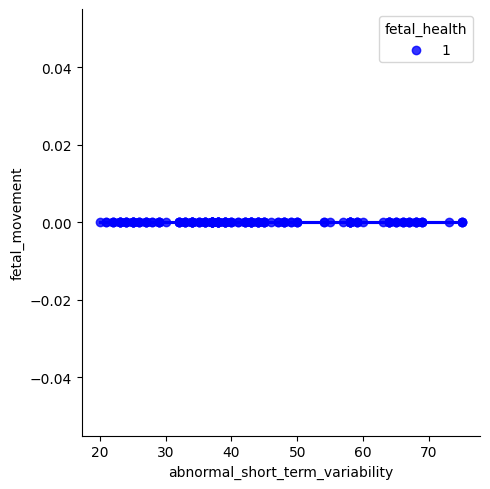

In [96]:
sns.lmplot(data=data, x="abnormal_short_term_variability", y="fetal_movement", palette=colours, hue="fetal_health", facet_kws={'legend_out': False})
plt.show()

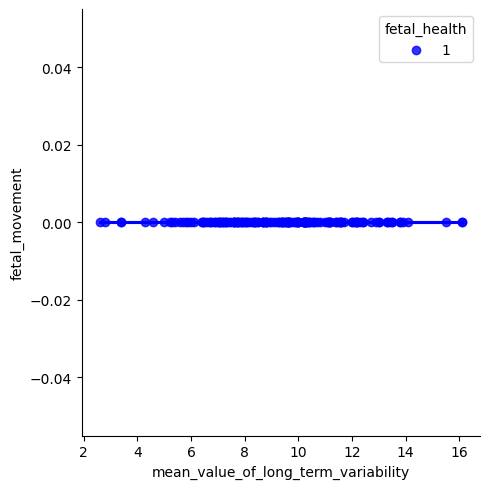

In [97]:
sns.lmplot(data=data, x="mean_value_of_long_term_variability", y="fetal_movement", palette=colours, hue="fetal_health", facet_kws={'legend_out': False})
plt.show()

In [98]:
cols = ['baseline value', 'accelerations', 'fetal_movement',
        'uterine_contractions', 'light_decelerations', 'severe_decelerations',
        'prolongued_decelerations', 'abnormal_short_term_variability',
        'mean_value_of_short_term_variability',
        'percentage_of_time_with_abnormal_long_term_variability',
        'mean_value_of_long_term_variability']

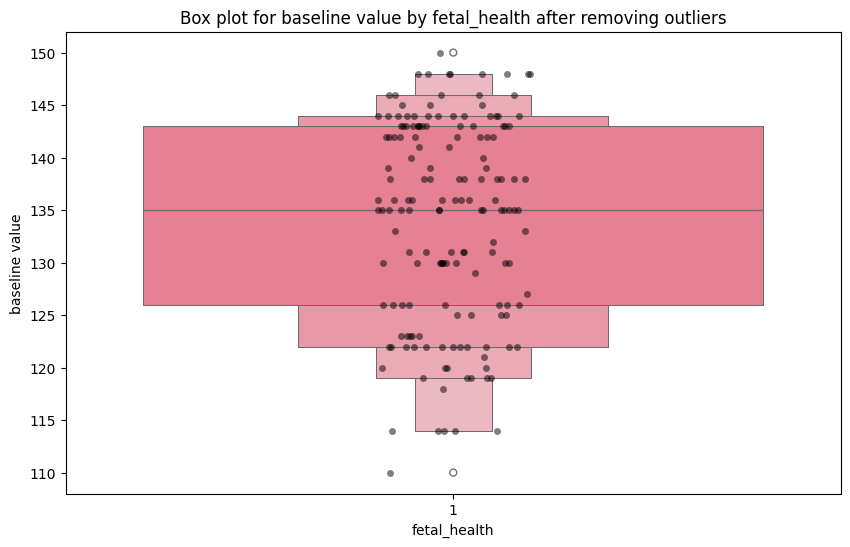

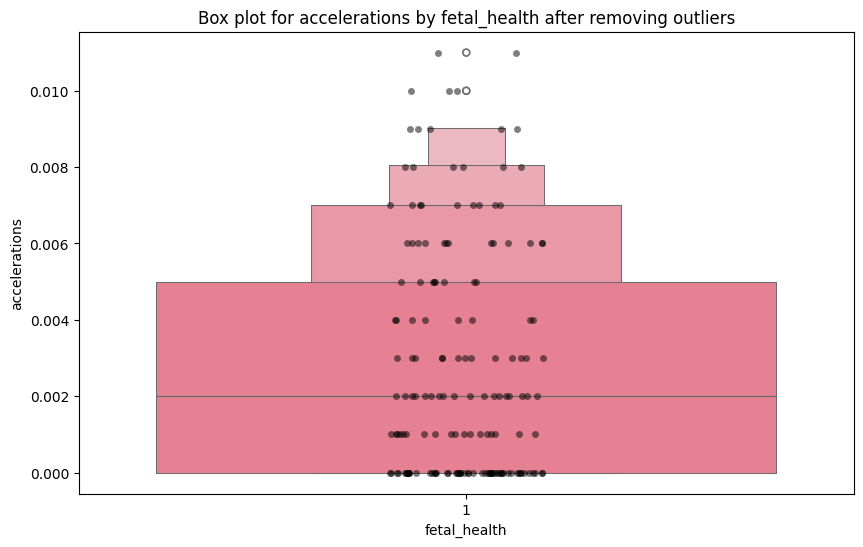

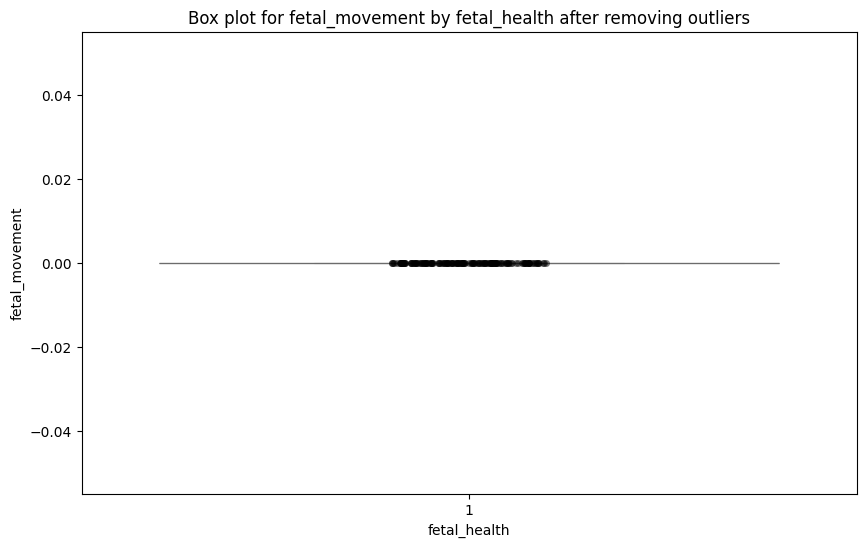

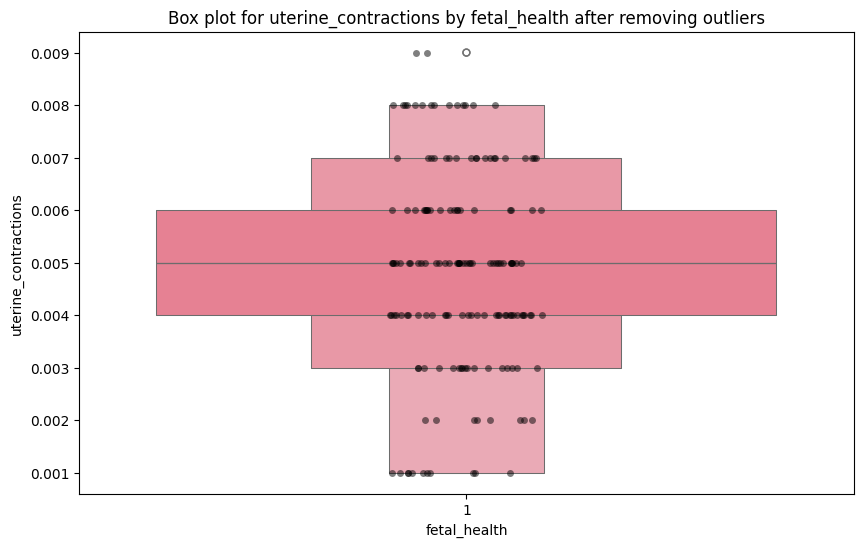

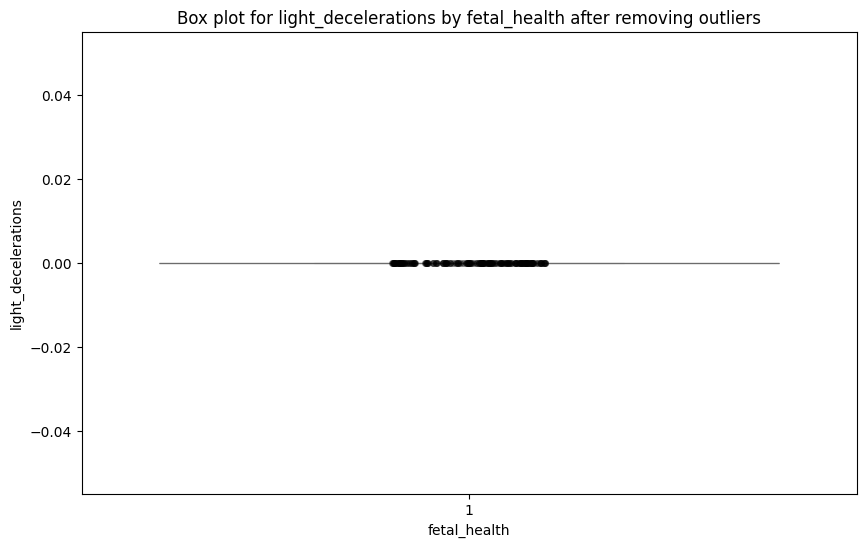

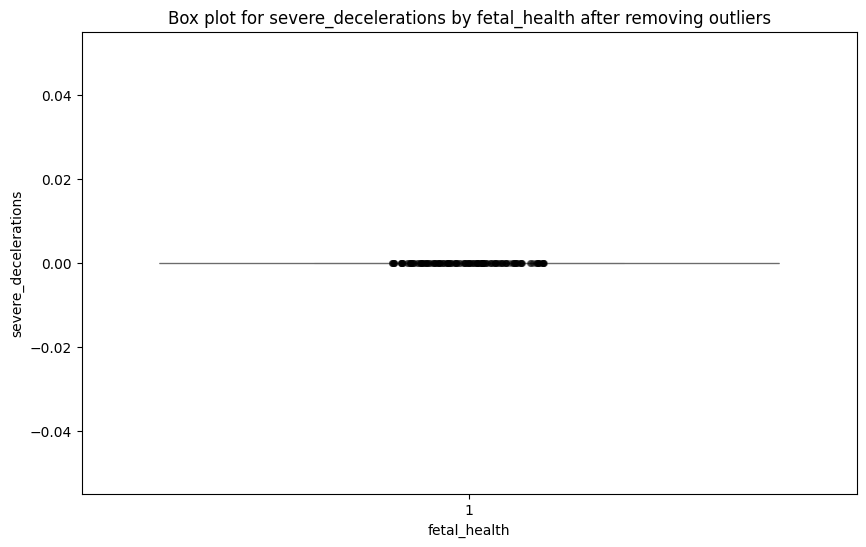

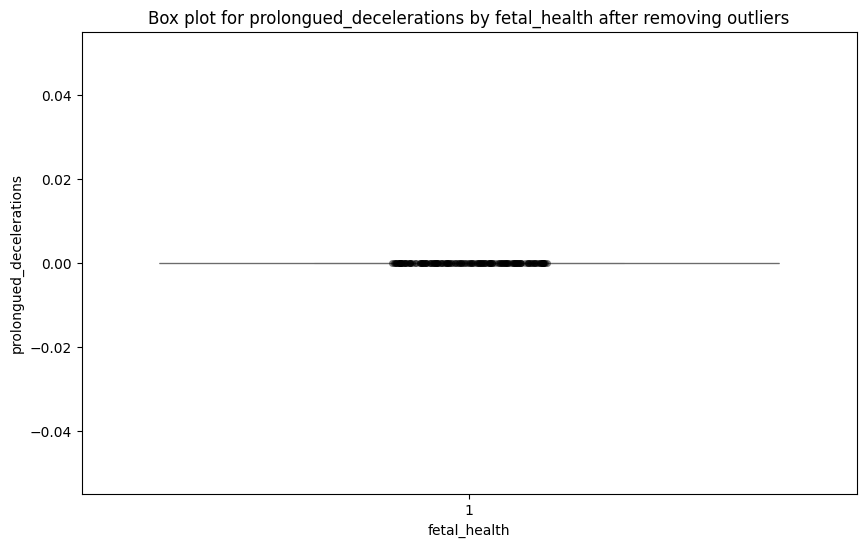

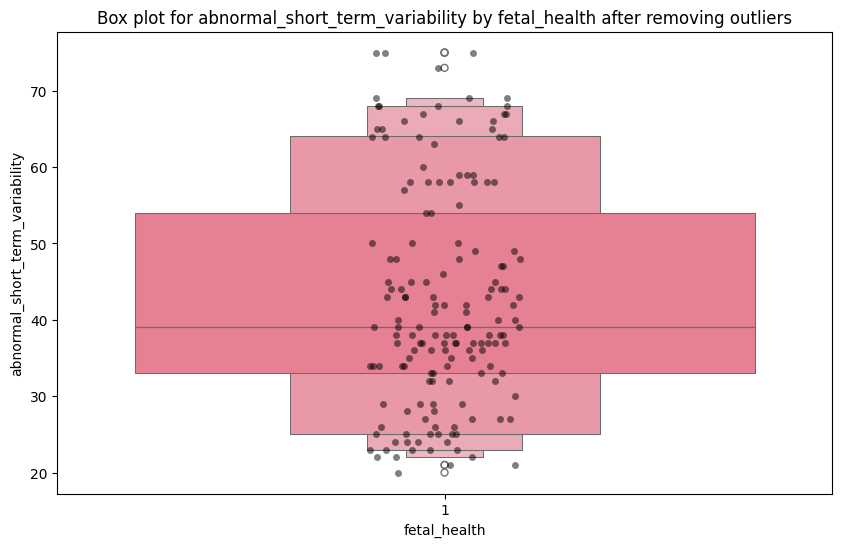

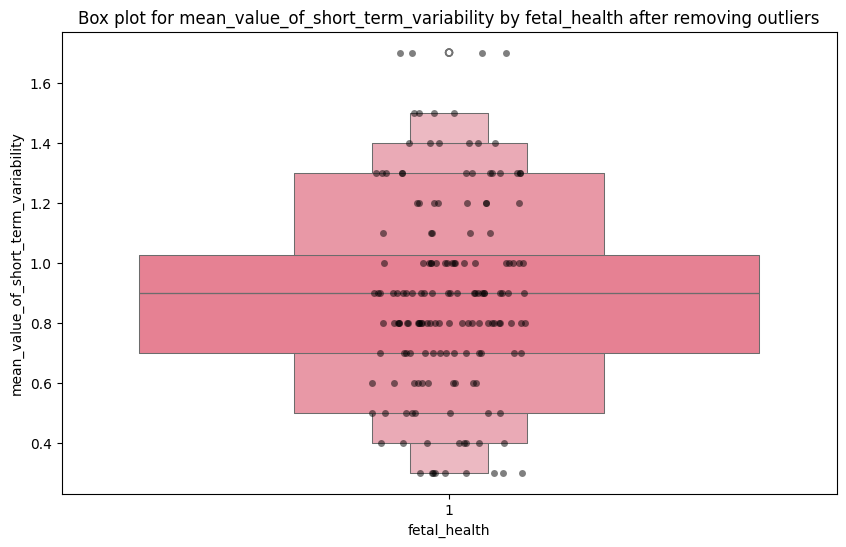

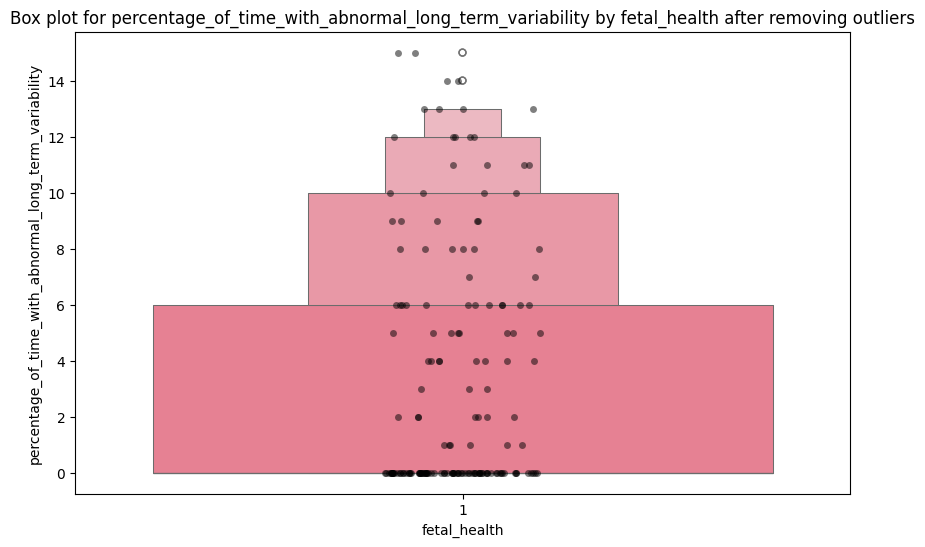

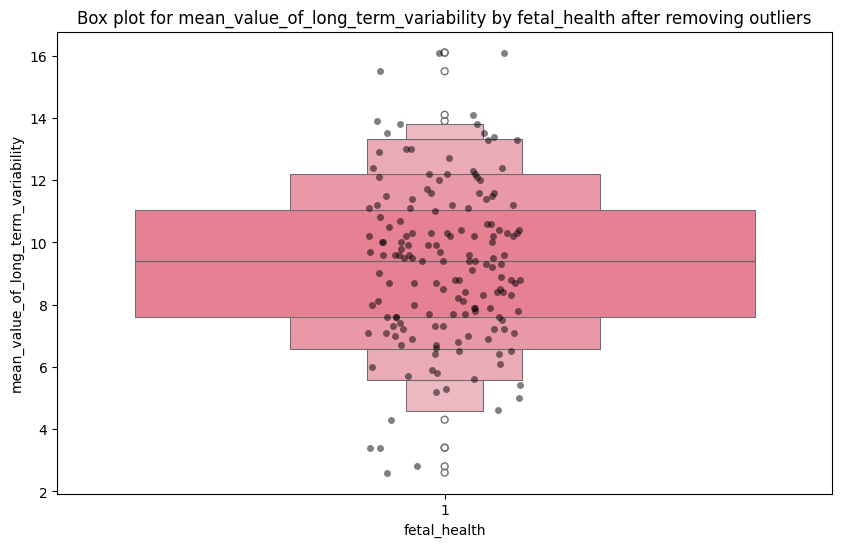

In [99]:
# Unique values in 'fetal_health' to create the palette
unique_fetal_health_values = data["fetal_health"].nunique()
colours = sns.color_palette("husl", unique_fetal_health_values)

# Plotting stripplots and boxenplots for each column after removing outliers
for i in cols:
    plt.figure(figsize=(10, 6))
    
    # Use stripplot
    sns.stripplot(x=data["fetal_health"], y=data[i], color="black", alpha=0.5)
    
    # Use boxenplot with correct palette
    sns.boxenplot(x=data["fetal_health"], y=data[i], hue=data["fetal_health"], palette=colours, dodge=False, legend=False)
    
    plt.title(f'Box plot for {i} by fetal_health after removing outliers')
    plt.show()


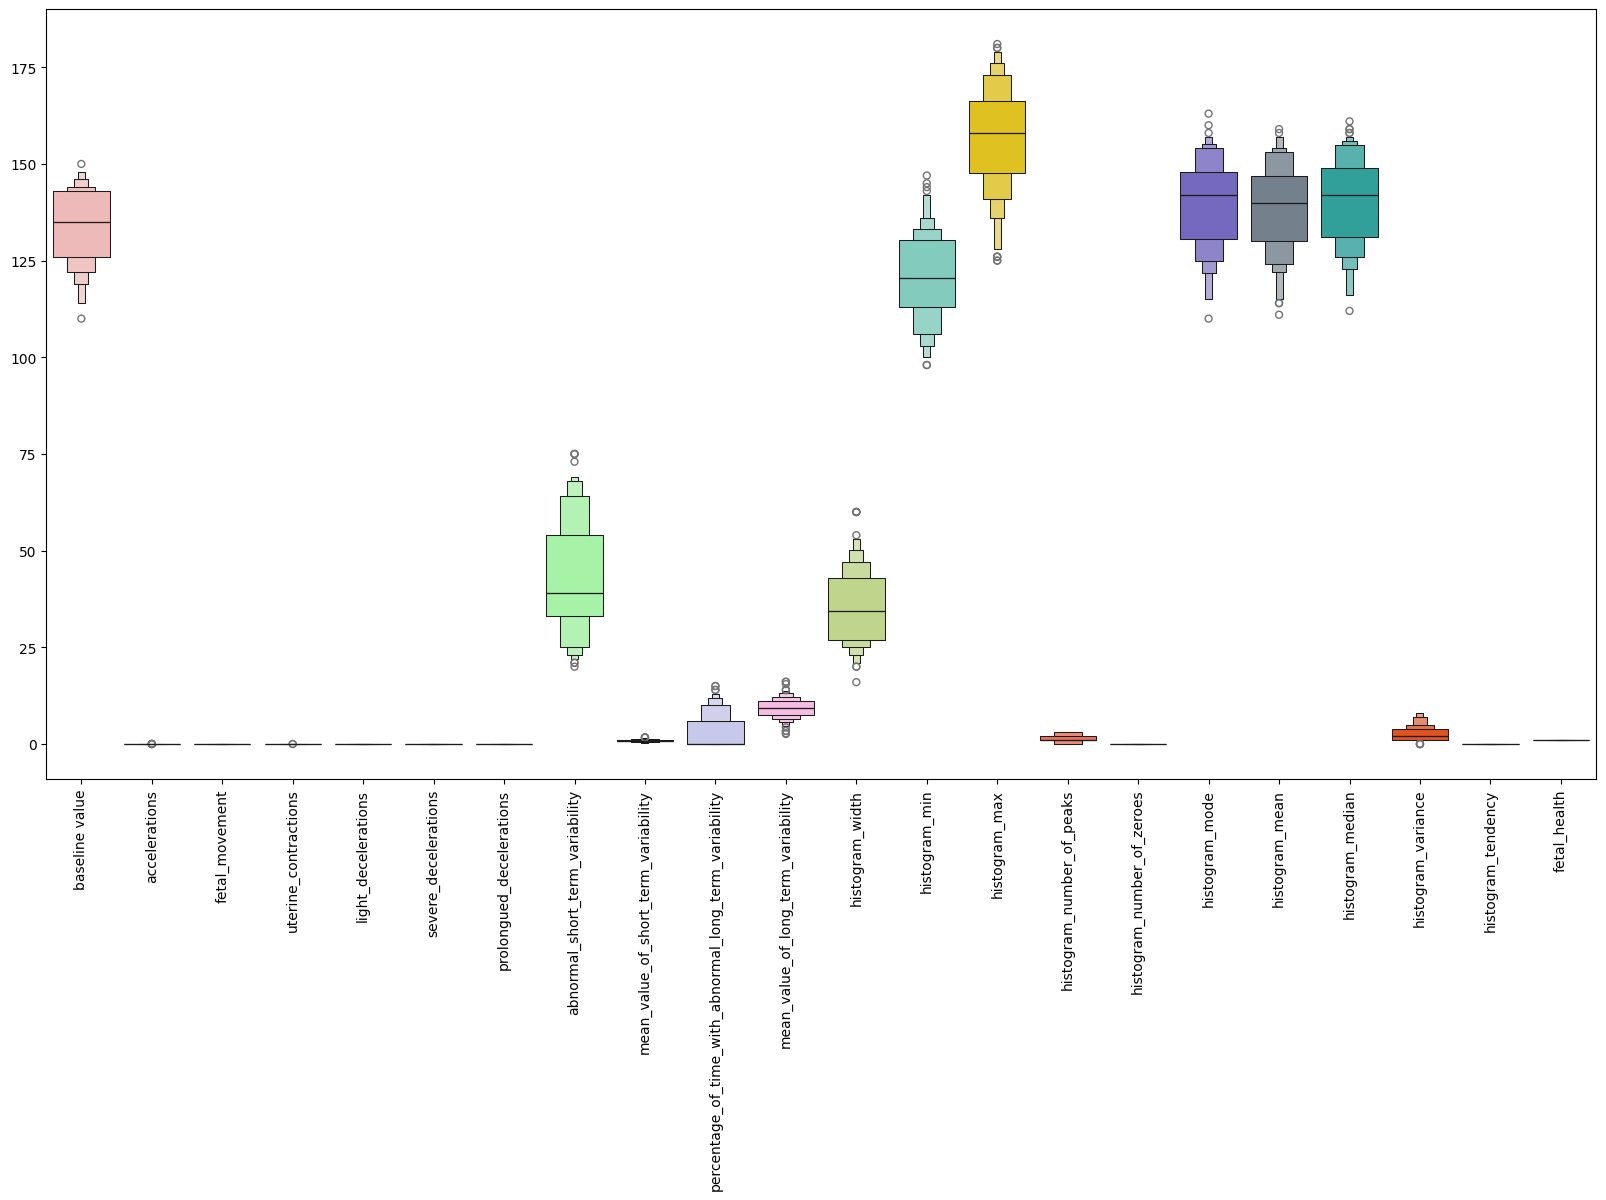

In [100]:
shades = ["#f7b2b0", "#c98ea6", "#8f7198", "#50587f", "#003f5c",
          "#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0",
          "#ffb3e6", "#c4e17f", "#76d7c4", "#ffd700", "#ff6347",
          "#4682b4", "#6a5acd", "#708090", "#20b2aa", "#ff4500",
          "#2e8b57", "#dda0dd"]

plt.figure(figsize=(20, 10))
sns.boxenplot(data=data, palette=shades)
plt.xticks(rotation=90)
plt.show()

MODEL SELECTION AND BUILDING

Set up features(X) and target(Y)

Scale the features

Split training and test sets

Model selection

Hyperparameter tuning

In [101]:
X = data.drop(["fetal_health"], axis=1)
Y = data["fetal_health"]

In [102]:


# Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,160.0,0.000000e+00,1.00314,-2.503319,-0.836610,0.100914,0.934269,1.663454
accelerations,160.0,1.110223e-17,1.00314,-0.919453,-0.919453,-0.267070,0.711506,2.668657
fetal_movement,160.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
uterine_contractions,160.0,-2.053913e-16,1.00314,-1.981020,-0.429813,0.087255,0.604324,2.155531
light_decelerations,160.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
severe_decelerations,160.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
prolongued_decelerations,160.0,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
abnormal_short_term_variability,160.0,0.000000e+00,1.00314,-1.566230,-0.668776,-0.254566,0.780958,2.230692
mean_value_of_short_term_variability,160.0,3.552714e-16,1.00314,-1.801021,-0.570868,0.044209,0.428631,2.504515
percentage_of_time_with_abnormal_long_term_variability,160.0,-3.330669e-17,1.00314,-0.764698,-0.764698,-0.764698,0.610040,2.672146


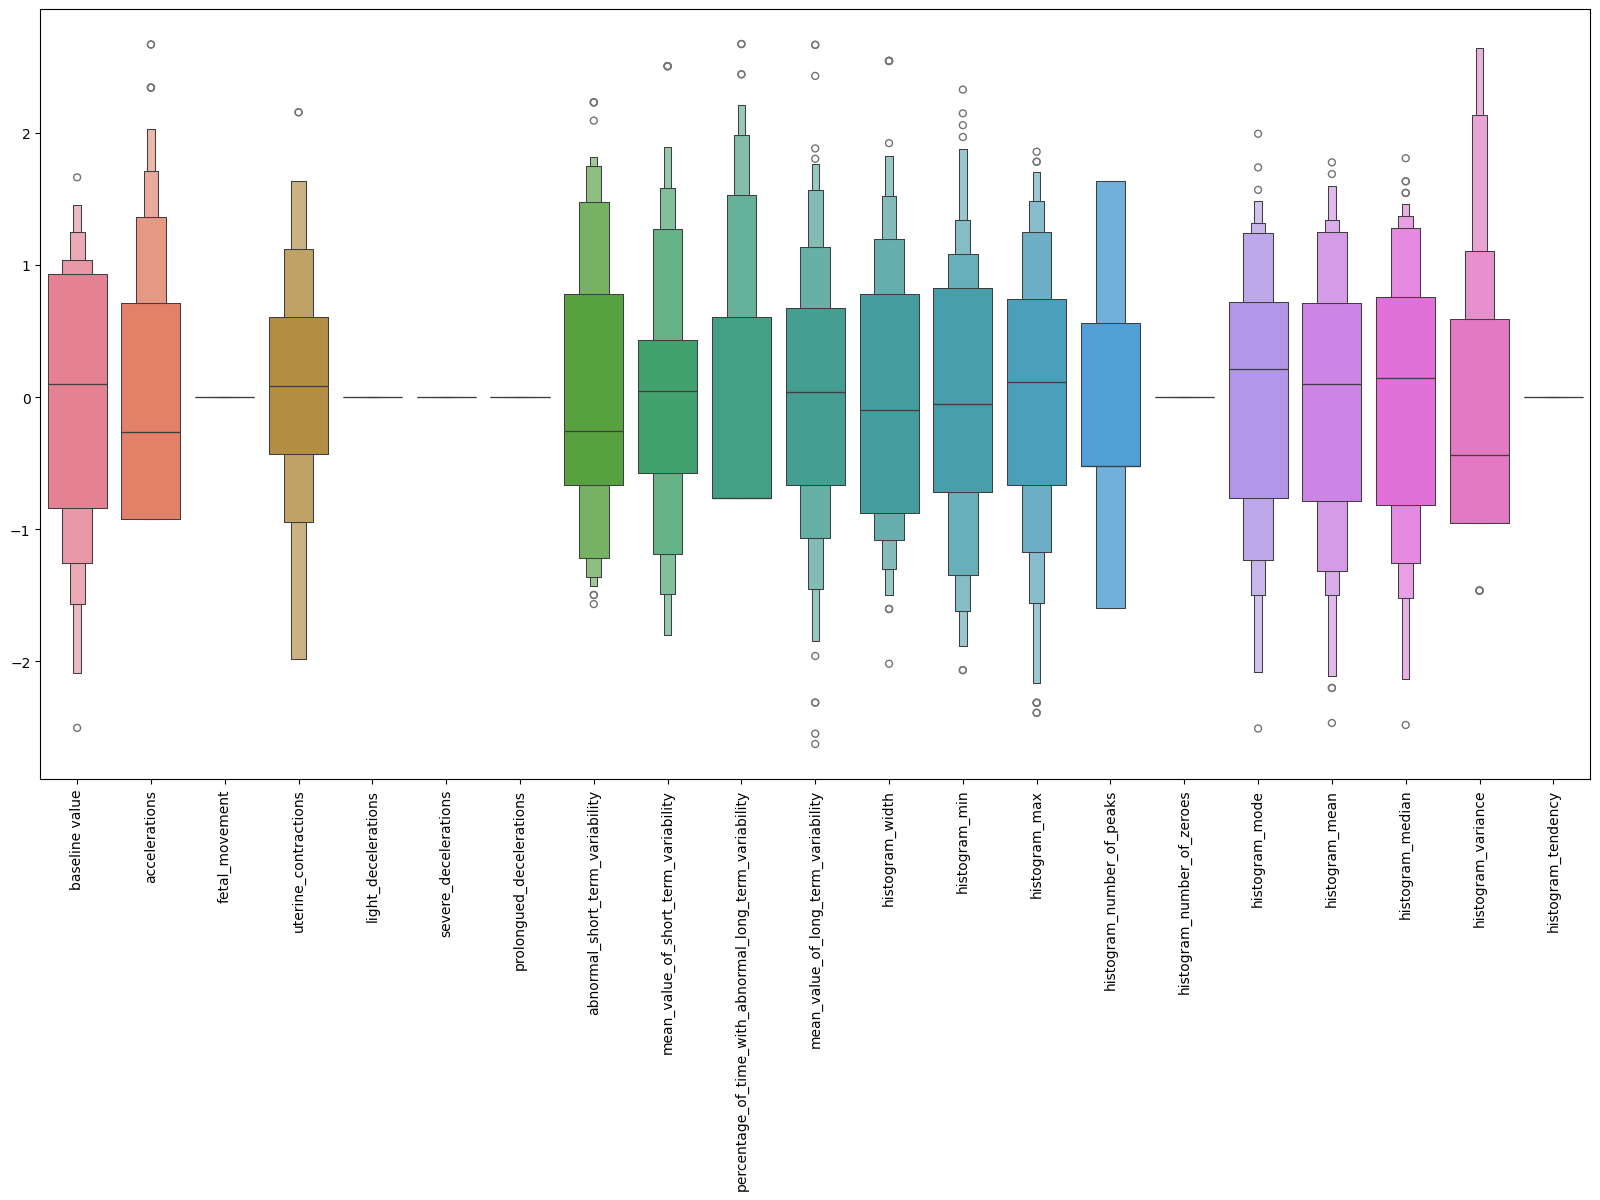

In [103]:
# Define the palette with enough colors for all features
num_features = len(X_df.columns)
shades = sns.color_palette("husl", num_features)

# Looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df, palette = shades)
plt.xticks(rotation=90)
plt.show()

In [108]:
X =  data[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']]
y = data['fetal_health']


In [109]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [106]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler

# Example data generation
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Stratified splitting of the dataset to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handling imbalanced data using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Define the pipelines for different classifiers
pipeline_lr = Pipeline([('lr_classifier', LogisticRegression(random_state=42))])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier(random_state=42))])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier(random_state=42))])
pipeline_svc = Pipeline([('sv_classifier', SVC(random_state=42))])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'SVC'}

# Fit the pipelines with resampled training data
for pipe in pipelines:
    pipe.fit(X_train_resampled, y_train_resampled)

# Cross-validation on accuracy
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=10)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.862500 
Decision Tree: 0.851250 
RandomForest: 0.893750 
SVC: 0.853750 


# LOGISTIC REGRESSION ALGORITHM

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [38]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
pred_train1 = clf.predict(X_train)
print("Predicted train data")
print(pred_train1)
pred_test1 = clf.predict(X_test)
print("Predicted test data")
print(pred_test1)

train_accuracy = accuracy_score(y_train, pred_train1)
print(f"Training Set Accuracy: {train_accuracy:.2f}")

test_accuracy = accuracy_score(y_test, pred_test1)
print(f"Test Set Accuracy: {test_accuracy:.2f}")
                                               

Predicted train data
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0
 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1
 1 0

In [40]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_train, pred_train1)
recall = recall_score(y_train,pred_train1, average="weighted")
precision = precision_score(y_train, pred_train1, average="weighted")
f1_score = f1_score(y_train, pred_train1, average="micro")

print("********* Logistic Regression Train Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Logistic Regression Train Data Results *********
Accuracy    :  0.8825
Recall      :  0.8825
Precision   :  0.8825552771364754
F1 Score    :  0.8825


In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_test, pred_test1)
recall = recall_score(y_test,pred_test1, average="weighted")
precision = precision_score(y_test, pred_test1, average="weighted")
f1_score = f1_score(y_test, pred_test1, average="micro")

print("********* Logistic Regression Test Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Logistic Regression Test Data Results *********
Accuracy    :  0.855
Recall      :  0.855
Precision   :  0.862345443596949
F1 Score    :  0.855


In [42]:
print(classification_report(y_train, pred_train1))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       407
           1       0.89      0.87      0.88       393

    accuracy                           0.88       800
   macro avg       0.88      0.88      0.88       800
weighted avg       0.88      0.88      0.88       800



In [43]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



<Axes: >

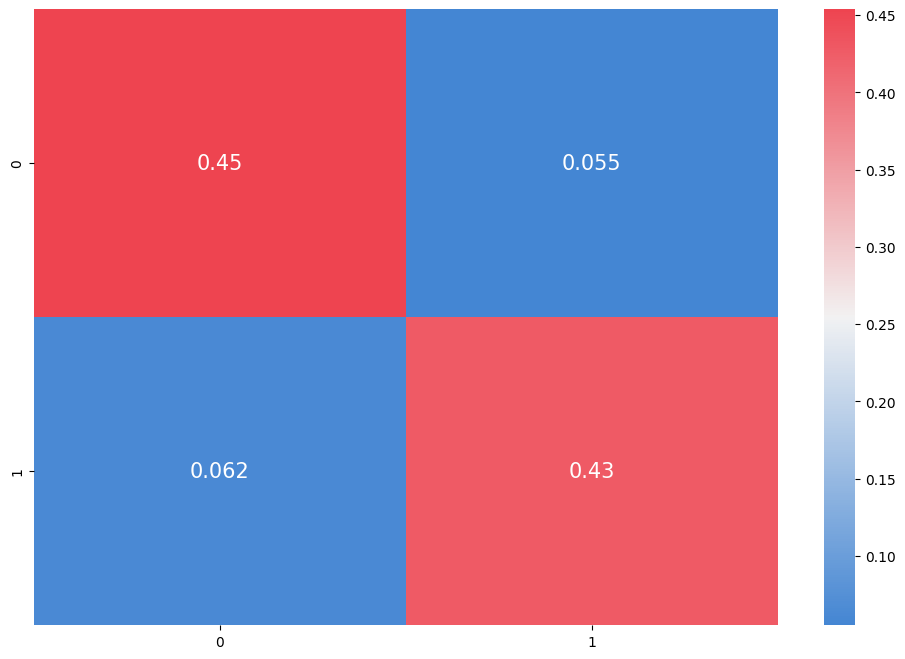

In [44]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_train, pred_train1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<Axes: >

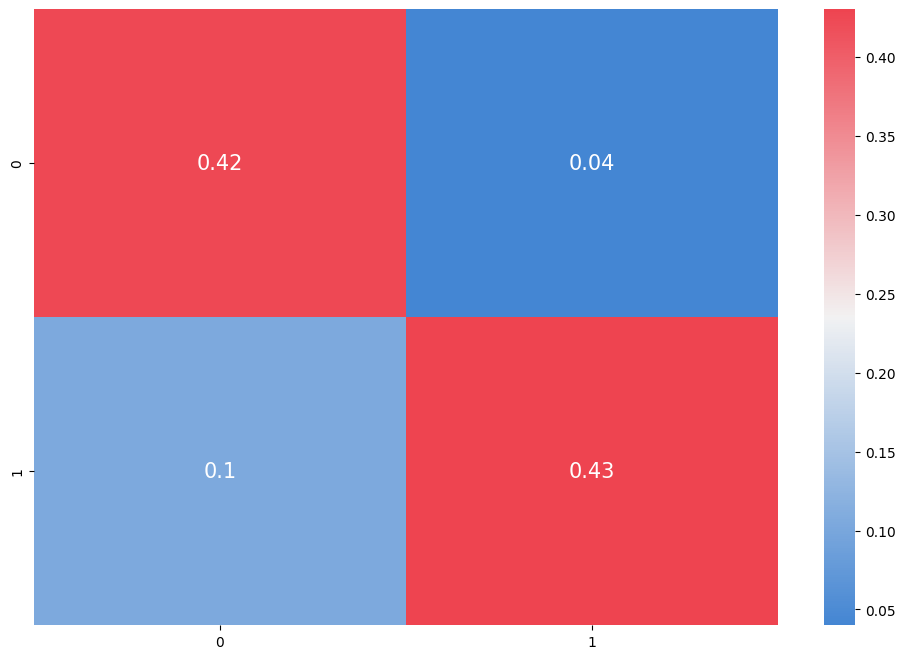

In [45]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_test1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# DECISION TREE ALGORITHM

In [46]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [47]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth = 4, min_samples_leaf=4)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

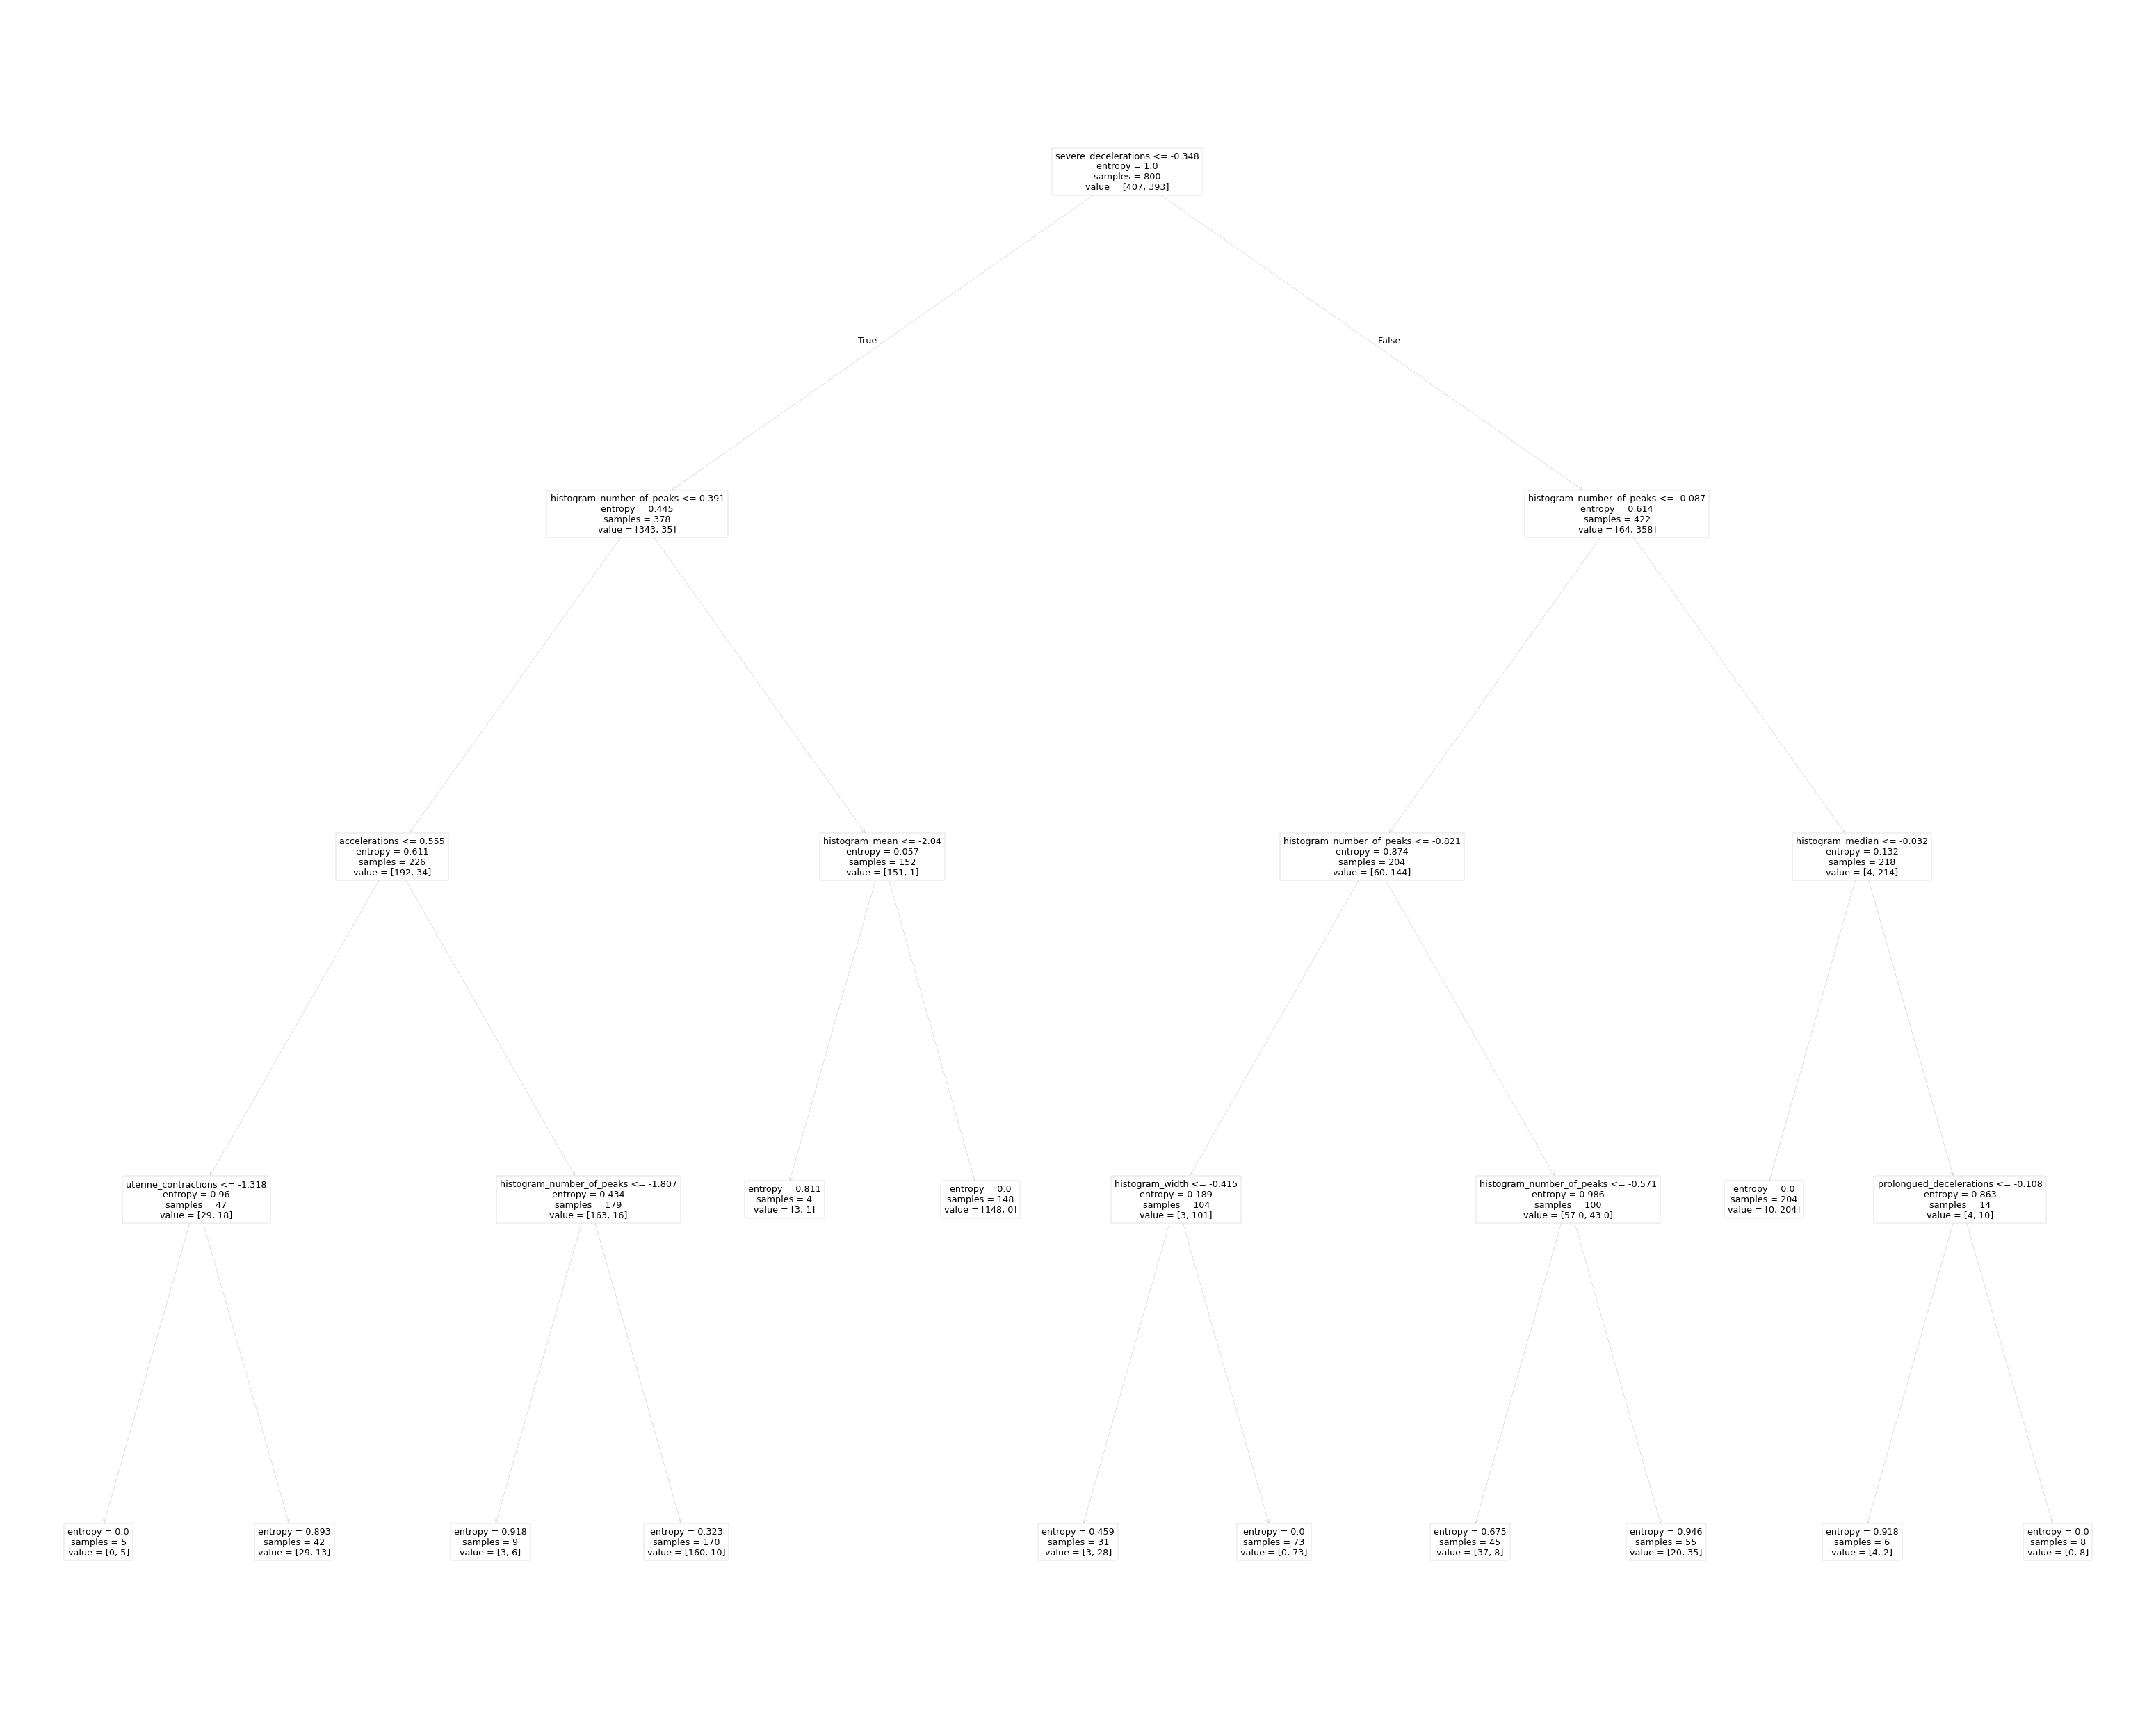

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree

# Example feature names based on your previous context
feature_names = [
    'baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions',
    'light_decelerations', 'severe_decelerations', 'prolongued_decelerations',
    'abnormal_short_term_variability', 'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min',
    'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes',
    'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance',
    'histogram_tendency'
]

fig, ax = plt.subplots(figsize=(500,400), dpi=8)   # Set the figure size to 700 by 600 (inches, not pixels)
tree.plot_tree(clf, ax=ax, feature_names=feature_names)


plt.show()

In [50]:
pred_train = clf.predict(X_train)
print("Predicted train data")
print(pred_train)

pred_test2 = clf.predict(X_test)
print("Predicted test data")
print(pred_test2)

train_accuracy = accuracy_score(y_train, pred_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, pred_test2)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Predicted train data
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1
 1 0

In [51]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_train, pred_train)
recall = recall_score(y_train,pred_train, average="weighted")
precision = precision_score(y_train, pred_train, average="weighted")
f1_score = f1_score(y_train, pred_train, average="micro")

print("********* Decision Tree Train Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Decision Tree Train Data Results *********
Accuracy    :  0.925
Recall      :  0.925
Precision   :  0.925143952433109
F1 Score    :  0.925


In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_test, pred_test2)
recall = recall_score(y_test,pred_test2, average="weighted")
precision = precision_score(y_test, pred_test2, average="weighted")
f1_score = f1_score(y_test, pred_test2, average="micro")

print("********* Decision Tree Test Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Decision Tree Test Data Results *********
Accuracy    :  0.87
Recall      :  0.87
Precision   :  0.8764360902255639
F1 Score    :  0.87


In [53]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       407
           1       0.93      0.91      0.92       393

    accuracy                           0.93       800
   macro avg       0.93      0.92      0.92       800
weighted avg       0.93      0.93      0.92       800



In [54]:
print(classification_report(y_test, pred_test2))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        93
           1       0.93      0.82      0.87       107

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



<Axes: >

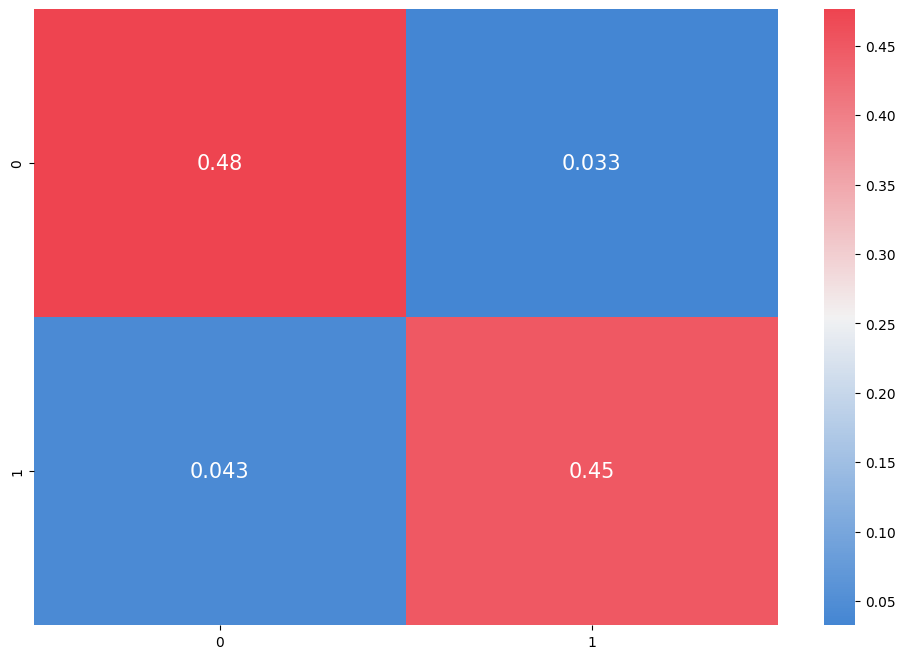

In [55]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<Axes: >

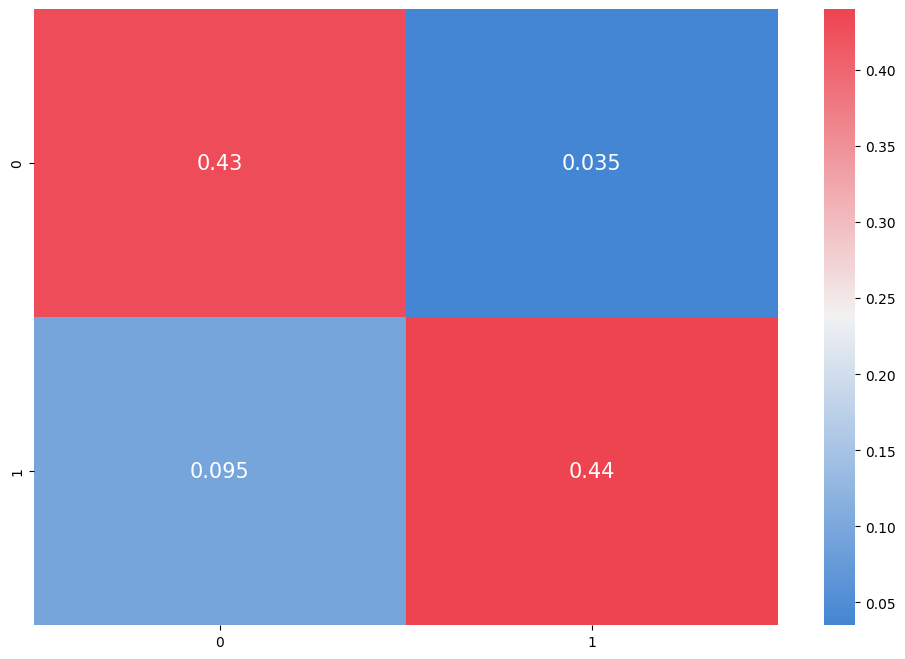

In [56]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_test2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

 # RANDOM FOREST ALGORITHM

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [58]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [59]:
pred_train= clf.predict(X_train)
print("Predicted train data")
print(pred_train)

pred_test = clf.predict(X_test)
print("Predicted test data")
print(pred_test)

train_accuracy = accuracy_score(y_train, pred_train)
print(f"Training Set Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, pred_test)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Predicted train data
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1
 1 1

In [60]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_train, pred_train)
recall = recall_score(y_train,pred_train, average="weighted")
precision = precision_score(y_train, pred_train, average="weighted")
f1_score = f1_score(y_train, pred_train, average="micro")

print("********* Random Forest Train Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Train Data Results *********
Accuracy    :  1.0
Recall      :  1.0
Precision   :  1.0
F1 Score    :  1.0


In [61]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_test, pred_test)
recall = recall_score(y_test,pred_test, average="weighted")
precision = precision_score(y_test, pred_test, average="weighted")
f1_score = f1_score(y_test, pred_test, average="micro")

print("********* Random Forest Test data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* Random Forest Test data Results *********
Accuracy    :  0.9
Recall      :  0.9
Precision   :  0.9047042338104293
F1 Score    :  0.9


In [62]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       407
           1       1.00      1.00      1.00       393

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [63]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



<Axes: >

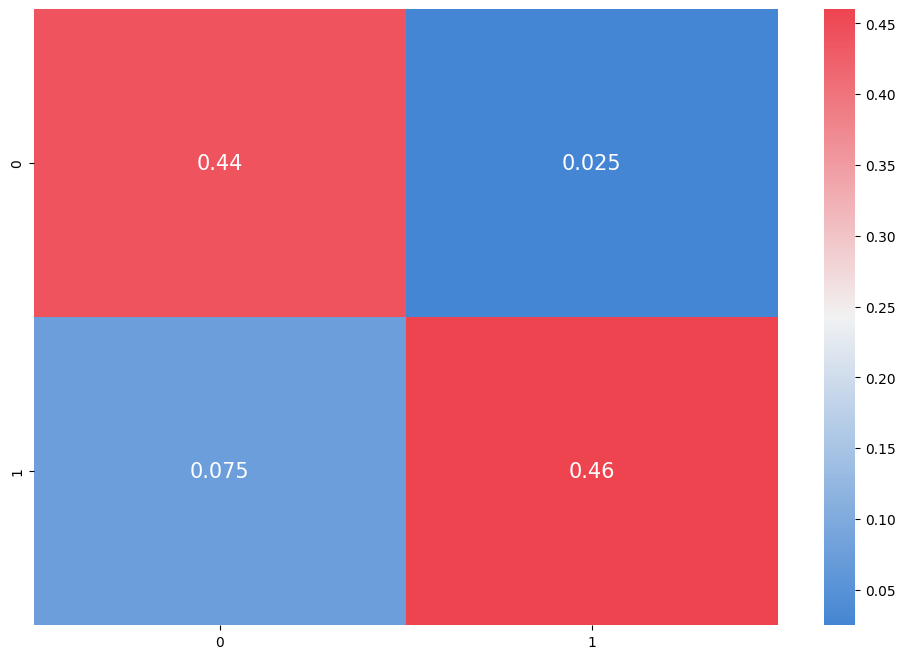

In [64]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_test)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<Axes: >

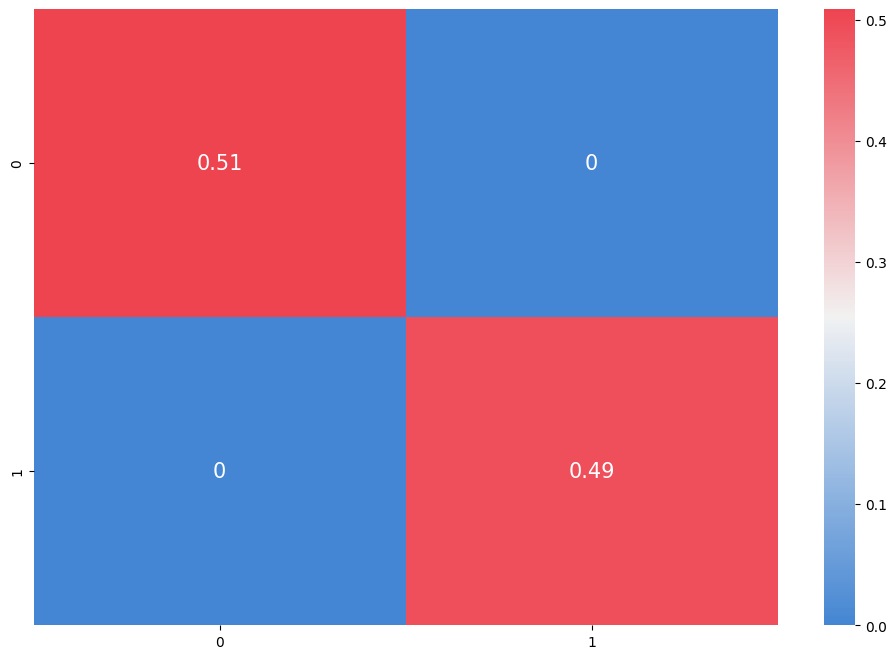

In [65]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

# SUPPORT VECTOR CLASSIFICATION

In [66]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state = 42)

In [67]:
clf = SVC( random_state=42)  
clf.fit(X_train, y_train)

SVC(random_state=42)

In [68]:
pred_train_set= clf.predict(X_train)
print("Predicted train data")
print(pred_train_set)

pred_test_set = clf.predict(X_test)
print("Predicted test data")
print(pred_test_set)

train_accuracy = accuracy_score(y_train, pred_train_set)
print(f"Training Set Accuracy: {train_accuracy:.2f}")


test_accuracy = accuracy_score(y_test, pred_test_set)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Predicted train data
[1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1
 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1
 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0
 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1
 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1
 1 0

In [69]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_train, pred_train_set)
recall = recall_score(y_train,pred_train_set, average="weighted")
precision = precision_score(y_train, pred_train_set, average="weighted")
f1_score = f1_score(y_train, pred_train_set, average="micro")

print("********* SVC Train Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* SVC Train Data Results *********
Accuracy    :  0.92875
Recall      :  0.92875
Precision   :  0.9287557981795903
F1 Score    :  0.92875


In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
acccuracy = accuracy_score(y_test, pred_test_set)
recall = recall_score(y_test,pred_test_set, average="weighted")
precision = precision_score(y_test, pred_test_set, average="weighted")
f1_score = f1_score(y_test, pred_test_set, average="micro")

print("********* SVC Test Data Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* SVC Test Data Results *********
Accuracy    :  0.845
Recall      :  0.845
Precision   :  0.8503766025641026
F1 Score    :  0.845


In [71]:
print(classification_report(y_train, pred_train_set))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       407
           1       0.93      0.93      0.93       393

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



In [72]:
print(classification_report(y_test, pred_test_set))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



<Axes: >

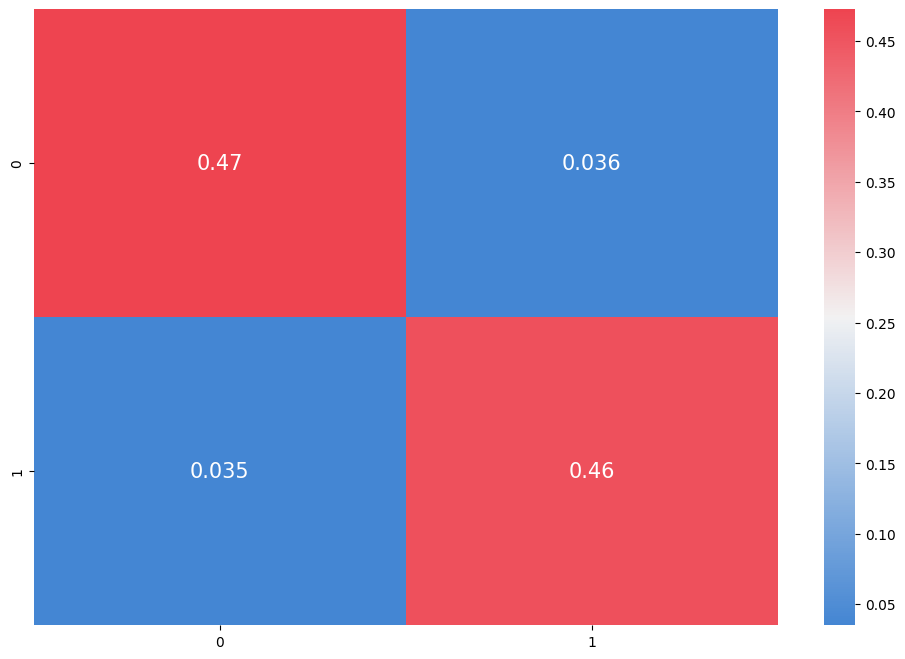

In [73]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_train, pred_train_set)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})

<Axes: >

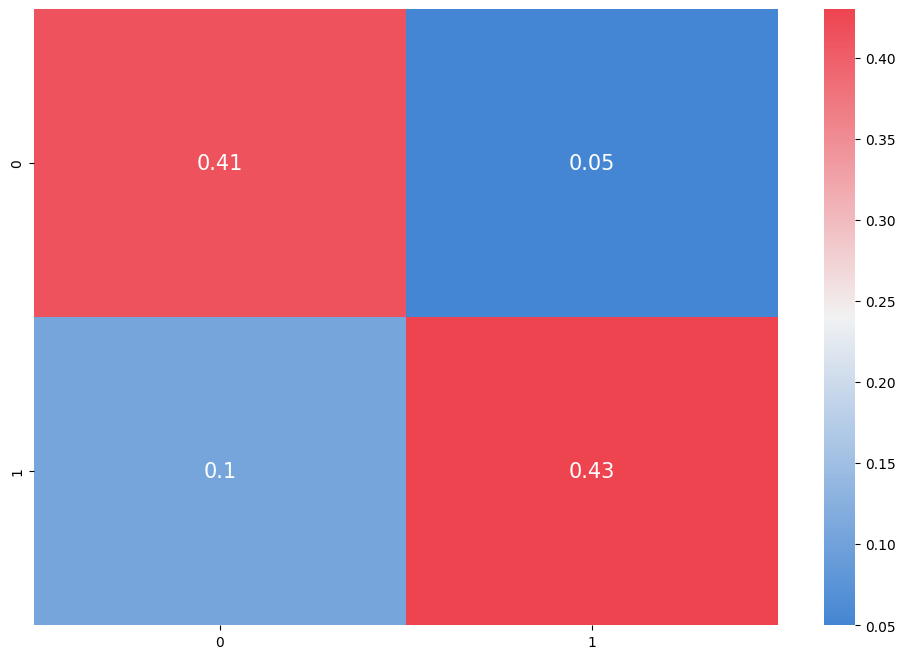

In [74]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, pred_test_set)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap=cmap,annot = True, annot_kws = {'size':15})